https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

In [272]:
#from numpy.random import seed
#seed(1)
#from tensorflow.random import set_seed
#set_seed(2)

In [1]:
from math import sqrt
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import RootMeanSquaredError
from keras.callbacks import EarlyStopping 

## Read data

Parse date-time, give more meaningful names

In [2]:
macrodata = pd.read_csv('../../DS4All_2020_Team28_Project/data/matrix/matrix_consol_v2.zip')
data = macrodata.iloc[:, 3:7]

mcs = data['mc'].unique()
mcs.sort()


# All basins

In [3]:
from math import sqrt
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import RootMeanSquaredError
from keras.callbacks import EarlyStopping 

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [4]:
macrodata = pd.read_csv('../../DS4All_2020_Team28_Project/data/matrix/matrix_consol_v2.zip')
data = macrodata.iloc[:, 3:7]

mcs = data['mc'].unique()
mcs.sort()



 ################ Basin 1 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00050: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
Epoch 00022: early stopping
24 batch size
Epoch 1/100
8/8 - 1s - loss: 0.0251 - rmse: 0.1585 - val_loss: 0.0332 - val_rmse: 0.1822
Epoch 2/100
8/8 - 0s - loss: 0.0139 - rmse: 0.1180 - val_loss: 0.0251 - val_rmse: 0.1583
Epoch 3/100
8/8 - 0s - loss: 0.0120 - rmse: 0.1097 - val_loss: 0.0233 - val_rmse: 0.1526
Epoch 4/100
8/8 - 0s - loss: 0.0110 - rmse: 0.1051 - val_loss: 0.0202 - val_rmse: 0.1420
Epoch 5/100
8/8 - 0s - loss: 0.0097 - rmse: 0.0985 - val_loss: 0.0185 - val_rmse: 0.1360
Epoch 6/100
8/8 - 0s - loss: 0.0091 - rmse: 0.0955 - val_loss: 0.0180 - val_rmse: 0.1341
Epoch 7/100
8/8 - 0s - loss: 0.0088 - rmse: 0.0938 - val_loss: 0.0169 - val_rmse: 0.1298
Epoch 8/100
8/8 - 0s - loss: 0.0085 - rmse: 0.0925 - val_loss: 0.0162 - val_rmse: 0.1272
Epoch 9/100
8/8 - 0s - 

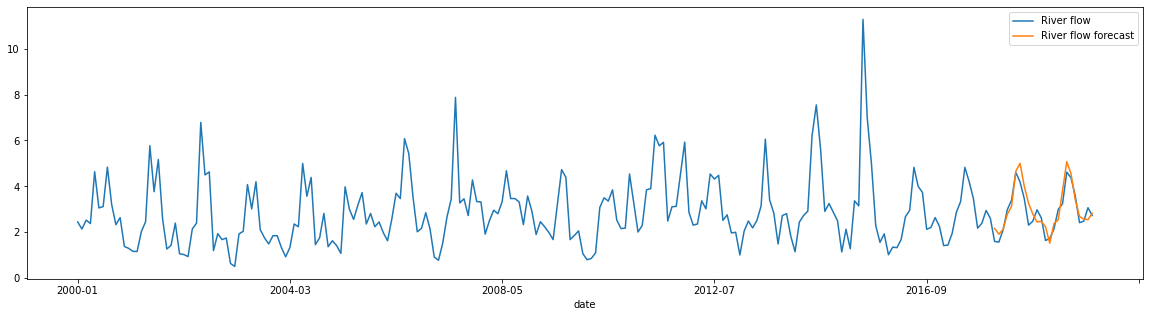


 ################ Basin 2 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00034: early stopping
Epoch 00022: early stopping
Epoch 00026: early stopping
Epoch 00021: early stopping
Epoch 00023: early stopping
Epoch 00025: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0903 - rmse: 0.3005 - val_loss: 0.0552 - val_rmse: 0.2350
Epoch 2/100
15/15 - 0s - loss: 0.0465 - rmse: 0.2157 - val_loss: 0.0505 - val_rmse: 0.2246
Epoch 3/100
15/15 - 0s - loss: 0.0396 - rmse: 0.1991 - val_loss: 0.0361 - val_rmse: 0.1901
Epoch 4/100
15/15 - 0s - loss: 0.0381 - rmse: 0.1953 - val_loss: 0.0345 - val_rmse: 0.1857
Epoch 5/100
15/15 - 0s - loss: 0.0348 - rmse: 0.1867 - val_loss: 0.0316 - val_rmse: 0.1779
Epoch 6/100
15/15 - 0s - loss: 0.0330 - rmse: 0.1817 - val_loss: 0.0296 - val_rmse: 0.1721
Epoch 7/100
15/15 - 0s - loss: 0.0311 - rmse: 0.1764 - val_loss: 0.0277 - val_rmse: 0.1665
Epoch 8/100
15/15 - 0s - loss: 0.0296 - rmse: 0.1721 - val_loss: 0.0263 - val_rmse: 0.1620
Epoch 9

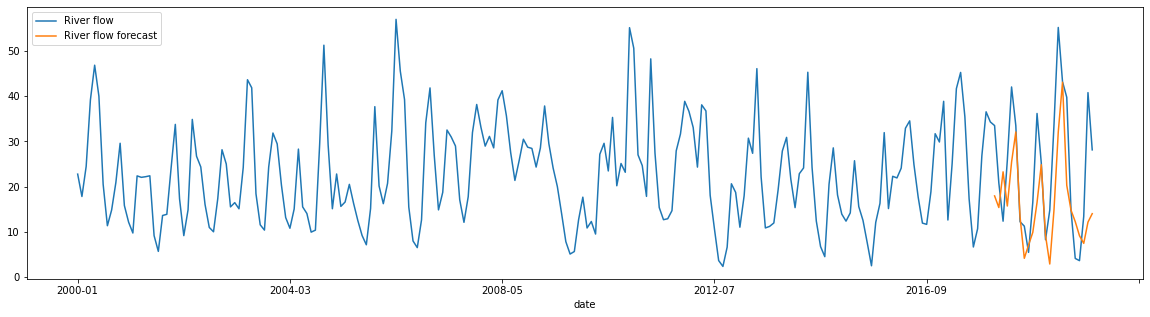


 ################ Basin 3 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00040: early stopping
Epoch 00021: early stopping
Epoch 00026: early stopping
Epoch 00025: early stopping
Epoch 00023: early stopping
Epoch 00030: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0695 - rmse: 0.2636 - val_loss: 0.0804 - val_rmse: 0.2835
Epoch 2/100
15/15 - 0s - loss: 0.0364 - rmse: 0.1908 - val_loss: 0.0741 - val_rmse: 0.2722
Epoch 3/100
15/15 - 0s - loss: 0.0341 - rmse: 0.1847 - val_loss: 0.0712 - val_rmse: 0.2668
Epoch 4/100
15/15 - 0s - loss: 0.0296 - rmse: 0.1721 - val_loss: 0.0661 - val_rmse: 0.2571
Epoch 5/100
15/15 - 0s - loss: 0.0270 - rmse: 0.1642 - val_loss: 0.0648 - val_rmse: 0.2546
Epoch 6/100
15/15 - 0s - loss: 0.0246 - rmse: 0.1568 - val_loss: 0.0615 - val_rmse: 0.2480
Epoch 7/100
15/15 - 0s - loss: 0.0230 - rmse: 0.1516 - val_loss: 0.0595 - val_rmse: 0.2439
Epoch 8/100
15/15 - 0s - loss: 0.0216 - rmse: 0.1470 - val_loss: 0.0577 - val_rmse: 0.2402
Epoch 9

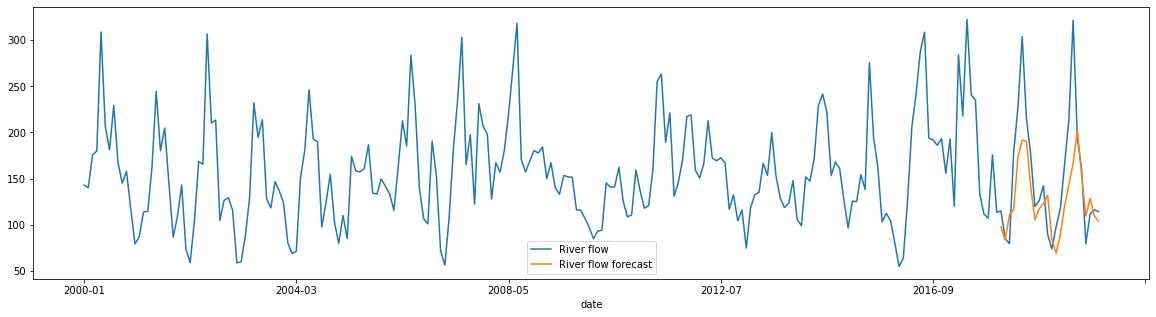


 ################ Basin 4 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00048: early stopping
Epoch 00022: early stopping
Epoch 00029: early stopping
Epoch 00021: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0433 - rmse: 0.2081 - val_loss: 0.0450 - val_rmse: 0.2122
Epoch 2/100
15/15 - 0s - loss: 0.0309 - rmse: 0.1758 - val_loss: 0.0211 - val_rmse: 0.1451
Epoch 3/100
15/15 - 0s - loss: 0.0287 - rmse: 0.1695 - val_loss: 0.0195 - val_rmse: 0.1397
Epoch 4/100
15/15 - 0s - loss: 0.0262 - rmse: 0.1619 - val_loss: 0.0161 - val_rmse: 0.1267
Epoch 5/100
15/15 - 0s - loss: 0.0247 - rmse: 0.1572 - val_loss: 0.0141 - val_rmse: 0.1187
Epoch 6/100
15/15 - 0s - loss: 0.0233 - rmse: 0.1527 - val_loss: 0.0126 - val_rmse: 0.1125
Epoch 7/100
15/15 - 0s - loss: 0.0225 - rmse: 0.1500 - val_loss: 0.0118 - val_rmse: 0.1087
Epoch 8/100
15/15 - 0s - loss: 0.0218 - rmse: 0.1477 - val_loss: 0.0112 - val_rmse: 0.1057
Epoch 9

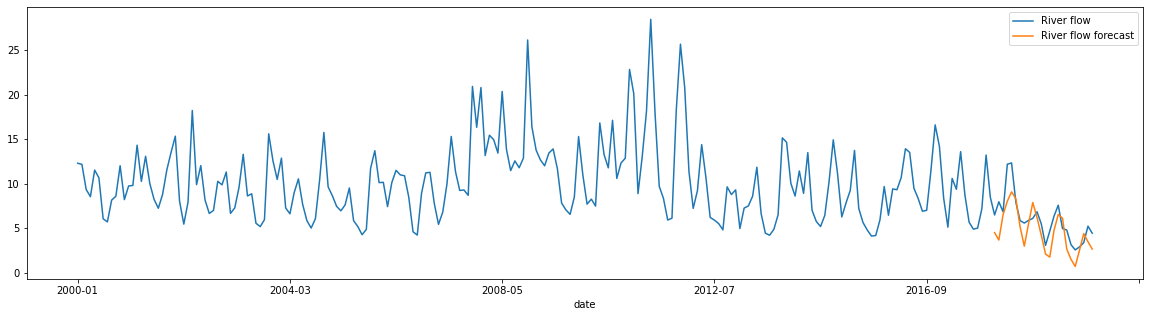


 ################ Basin 5 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00057: early stopping
Epoch 00021: early stopping
Epoch 00027: early stopping
Epoch 00021: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0566 - rmse: 0.2380 - val_loss: 0.0434 - val_rmse: 0.2084
Epoch 2/100
15/15 - 0s - loss: 0.0337 - rmse: 0.1835 - val_loss: 0.0334 - val_rmse: 0.1827
Epoch 3/100
15/15 - 0s - loss: 0.0323 - rmse: 0.1797 - val_loss: 0.0230 - val_rmse: 0.1515
Epoch 4/100
15/15 - 0s - loss: 0.0286 - rmse: 0.1691 - val_loss: 0.0254 - val_rmse: 0.1593
Epoch 5/100
15/15 - 0s - loss: 0.0274 - rmse: 0.1656 - val_loss: 0.0221 - val_rmse: 0.1487
Epoch 6/100
15/15 - 0s - loss: 0.0262 - rmse: 0.1620 - val_loss: 0.0212 - val_rmse: 0.1455
Epoch 7/100
15/15 - 0s - loss: 0.0250 - rmse: 0.1582 - val_loss: 0.0201 - val_rmse: 0.1419
Epoch 8/100
15/15 - 0s - loss: 0.0241 - rmse: 0.1553 - val_loss: 0.0192 - val_rmse: 0.1387
Epoch 9

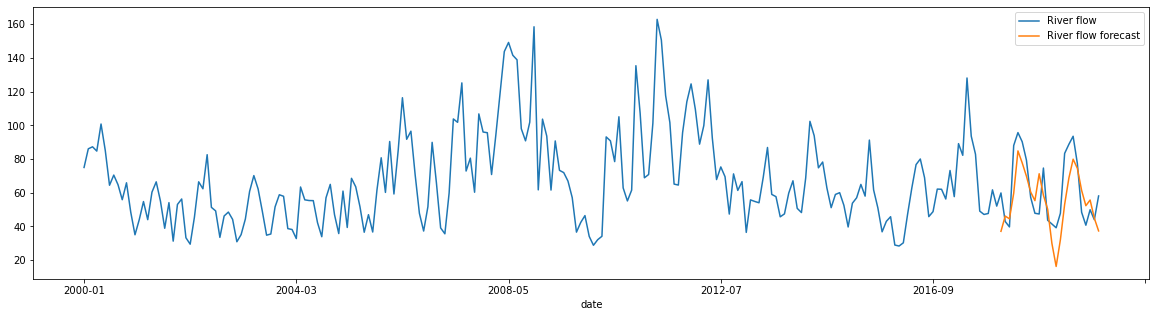


 ################ Basin 6 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00069: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0720 - rmse: 0.2684 - val_loss: 0.0175 - val_rmse: 0.1323
Epoch 2/100
15/15 - 0s - loss: 0.0455 - rmse: 0.2132 - val_loss: 0.0133 - val_rmse: 0.1155
Epoch 3/100
15/15 - 0s - loss: 0.0370 - rmse: 0.1924 - val_loss: 0.0127 - val_rmse: 0.1125
Epoch 4/100
15/15 - 0s - loss: 0.0328 - rmse: 0.1812 - val_loss: 0.0132 - val_rmse: 0.1150
Epoch 5/100
15/15 - 0s - loss: 0.0291 - rmse: 0.1705 - val_loss: 0.0144 - val_rmse: 0.1202
Epoch 6/100
15/15 - 0s - loss: 0.0267 - rmse: 0.1633 - val_loss: 0.0158 - val_rmse: 0.1256
Epoch 7/100
15/15 - 0s - loss: 0.0251 - rmse: 0.1584 - val_loss: 0.0159 - val_rmse: 0.1262
Epoch 8/100
15/15 - 0s - loss: 0.0238 - rmse: 0.1544 - val_loss: 0.0158 - val_rmse: 0.1257
Epoch 9

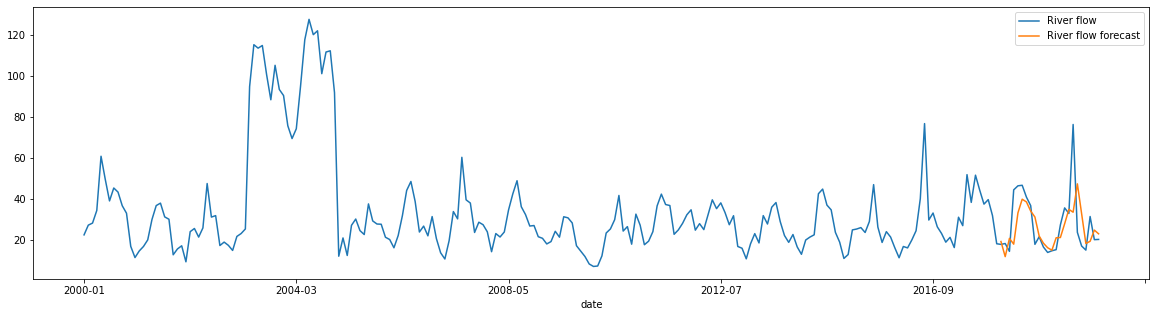


 ################ Basin 7 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00033: early stopping
Epoch 00021: early stopping
Epoch 00026: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0714 - rmse: 0.2672 - val_loss: 0.0558 - val_rmse: 0.2361
Epoch 2/100
15/15 - 0s - loss: 0.0338 - rmse: 0.1840 - val_loss: 0.0513 - val_rmse: 0.2266
Epoch 3/100
15/15 - 0s - loss: 0.0283 - rmse: 0.1682 - val_loss: 0.0262 - val_rmse: 0.1620
Epoch 4/100
15/15 - 0s - loss: 0.0269 - rmse: 0.1639 - val_loss: 0.0269 - val_rmse: 0.1641
Epoch 5/100
15/15 - 0s - loss: 0.0244 - rmse: 0.1562 - val_loss: 0.0240 - val_rmse: 0.1549
Epoch 6/100
15/15 - 0s - loss: 0.0231 - rmse: 0.1521 - val_loss: 0.0207 - val_rmse: 0.1440
Epoch 7/100
15/15 - 0s - loss: 0.0218 - rmse: 0.1478 - val_loss: 0.0193 - val_rmse: 0.1388
Epoch 8/100
15/15 - 0s - loss: 0.0207 - rmse: 0.1440 - val_loss: 0.0177 - val_rmse: 0.1329
Epoch 9

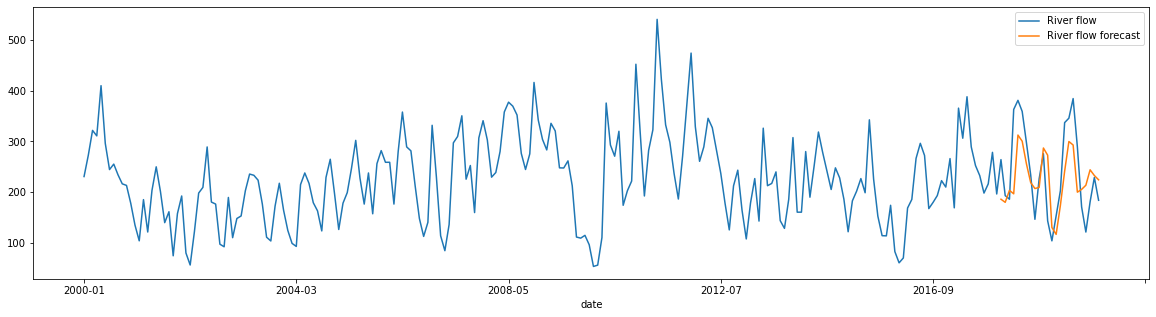


 ################ Basin 8 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00036: early stopping
Epoch 00022: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0963 - rmse: 0.3103 - val_loss: 0.0703 - val_rmse: 0.2652
Epoch 2/100
15/15 - 0s - loss: 0.0384 - rmse: 0.1959 - val_loss: 0.0361 - val_rmse: 0.1900
Epoch 3/100
15/15 - 0s - loss: 0.0365 - rmse: 0.1910 - val_loss: 0.0339 - val_rmse: 0.1841
Epoch 4/100
15/15 - 0s - loss: 0.0308 - rmse: 0.1754 - val_loss: 0.0328 - val_rmse: 0.1812
Epoch 5/100
15/15 - 0s - loss: 0.0275 - rmse: 0.1658 - val_loss: 0.0344 - val_rmse: 0.1856
Epoch 6/100
15/15 - 0s - loss: 0.0254 - rmse: 0.1592 - val_loss: 0.0341 - val_rmse: 0.1847
Epoch 7/100
15/15 - 0s - loss: 0.0235 - rmse: 0.1533 - val_loss: 0.0340 - val_rmse: 0.1845
Epoch 8/100
15/15 - 0s - loss: 0.0220 - rmse: 0.1484 - val_loss: 0.0332 - val_rmse: 0.1821
Epoch 9

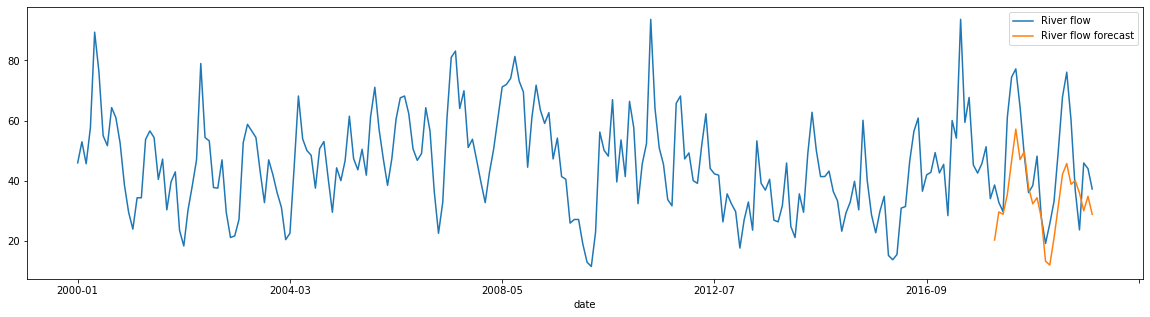


 ################ Basin 9 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00030: early stopping
Epoch 00021: early stopping
Epoch 00026: early stopping
Epoch 00021: early stopping
Epoch 00029: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 2s - loss: 0.0768 - rmse: 0.2771 - val_loss: 0.0441 - val_rmse: 0.2100
Epoch 2/100
15/15 - 0s - loss: 0.0381 - rmse: 0.1953 - val_loss: 0.0260 - val_rmse: 0.1613
Epoch 3/100
15/15 - 0s - loss: 0.0298 - rmse: 0.1728 - val_loss: 0.0201 - val_rmse: 0.1416
Epoch 4/100
15/15 - 0s - loss: 0.0229 - rmse: 0.1515 - val_loss: 0.0173 - val_rmse: 0.1315
Epoch 5/100
15/15 - 0s - loss: 0.0199 - rmse: 0.1411 - val_loss: 0.0167 - val_rmse: 0.1292
Epoch 6/100
15/15 - 0s - loss: 0.0184 - rmse: 0.1356 - val_loss: 0.0162 - val_rmse: 0.1275
Epoch 7/100
15/15 - 0s - loss: 0.0175 - rmse: 0.1324 - val_loss: 0.0156 - val_rmse: 0.1248
Epoch 8/100
15/15 - 0s - loss: 0.0168 - rmse: 0.1298 - val_loss: 0.0152 - val_rmse: 0.1235
Epoch 9

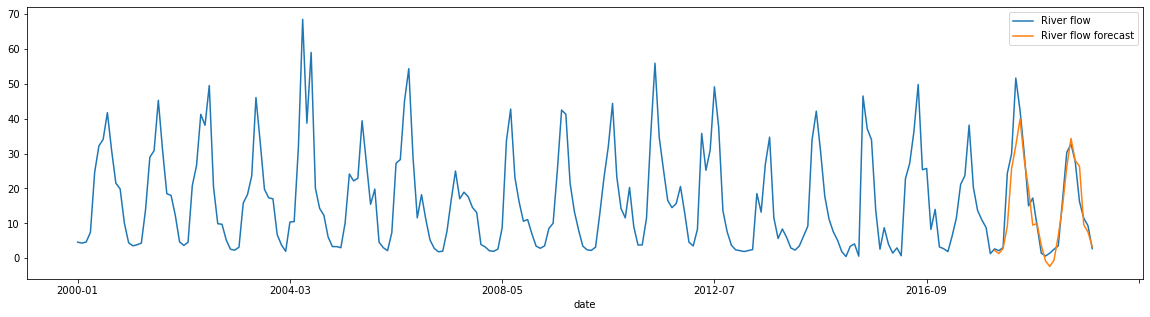


 ################ Basin 10 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00031: early stopping
Epoch 00022: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0240 - rmse: 0.1548 - val_loss: 0.0142 - val_rmse: 0.1192
Epoch 2/100
15/15 - 0s - loss: 0.0173 - rmse: 0.1314 - val_loss: 0.0083 - val_rmse: 0.0911
Epoch 3/100
15/15 - 0s - loss: 0.0155 - rmse: 0.1244 - val_loss: 0.0082 - val_rmse: 0.0906
Epoch 4/100
15/15 - 0s - loss: 0.0146 - rmse: 0.1207 - val_loss: 0.0076 - val_rmse: 0.0874
Epoch 5/100
15/15 - 0s - loss: 0.0137 - rmse: 0.1171 - val_loss: 0.0072 - val_rmse: 0.0846
Epoch 6/100
15/15 - 0s - loss: 0.0133 - rmse: 0.1152 - val_loss: 0.0069 - val_rmse: 0.0831
Epoch 7/100
15/15 - 0s - loss: 0.0127 - rmse: 0.1129 - val_loss: 0.0064 - val_rmse: 0.0798
Epoch 8/100
15/15 - 0s - loss: 0.0125 - rmse: 0.1117 - val_loss: 0.0062 - val_rmse: 0.0788
Epoch 

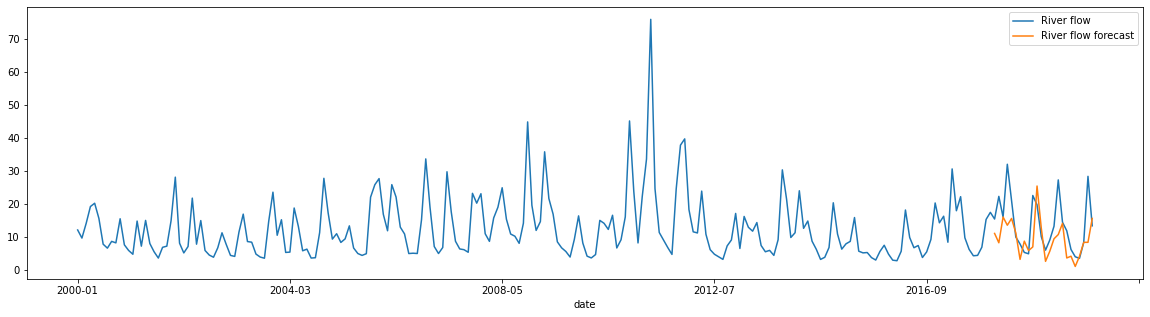


 ################ Basin 11 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00028: early stopping
Epoch 00023: early stopping
Epoch 00026: early stopping
Epoch 00021: early stopping
Epoch 00023: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0440 - rmse: 0.2096 - val_loss: 0.0336 - val_rmse: 0.1832
Epoch 2/100
15/15 - 0s - loss: 0.0295 - rmse: 0.1719 - val_loss: 0.0256 - val_rmse: 0.1601
Epoch 3/100
15/15 - 0s - loss: 0.0292 - rmse: 0.1708 - val_loss: 0.0248 - val_rmse: 0.1576
Epoch 4/100
15/15 - 0s - loss: 0.0272 - rmse: 0.1651 - val_loss: 0.0242 - val_rmse: 0.1556
Epoch 5/100
15/15 - 0s - loss: 0.0267 - rmse: 0.1634 - val_loss: 0.0236 - val_rmse: 0.1537
Epoch 6/100
15/15 - 0s - loss: 0.0256 - rmse: 0.1600 - val_loss: 0.0233 - val_rmse: 0.1527
Epoch 7/100
15/15 - 0s - loss: 0.0254 - rmse: 0.1593 - val_loss: 0.0231 - val_rmse: 0.1521
Epoch 8/100
15/15 - 0s - loss: 0.0247 - rmse: 0.1570 - val_loss: 0.0230 - val_rmse: 0.1518
Epoch 9/100
15/15 - 0s - loss: 0.0

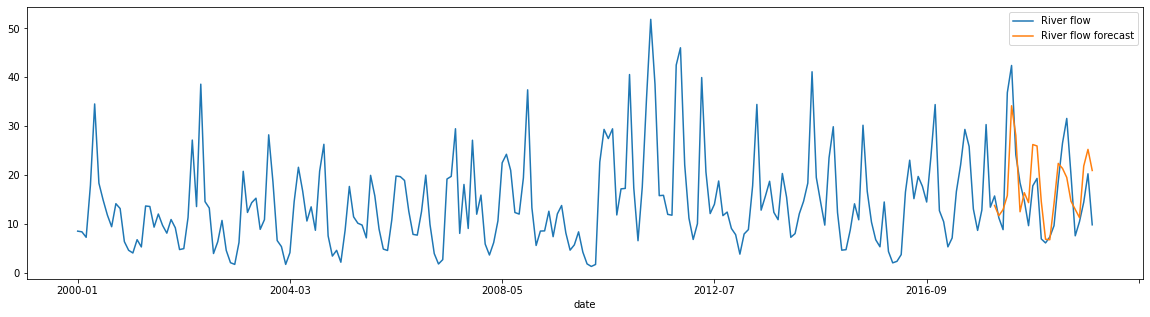


 ################ Basin 12 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00041: early stopping
Epoch 00022: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00022: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0550 - rmse: 0.2345 - val_loss: 0.0665 - val_rmse: 0.2579
Epoch 2/100
15/15 - 0s - loss: 0.0131 - rmse: 0.1146 - val_loss: 0.0305 - val_rmse: 0.1747
Epoch 3/100
15/15 - 0s - loss: 0.0123 - rmse: 0.1107 - val_loss: 0.0262 - val_rmse: 0.1617
Epoch 4/100
15/15 - 0s - loss: 0.0103 - rmse: 0.1014 - val_loss: 0.0260 - val_rmse: 0.1611
Epoch 5/100
15/15 - 0s - loss: 0.0096 - rmse: 0.0981 - val_loss: 0.0239 - val_rmse: 0.1545
Epoch 6/100
15/15 - 0s - loss: 0.0091 - rmse: 0.0953 - val_loss: 0.0235 - val_rmse: 0.1533
Epoch 7/100
15/15 - 0s - loss: 0.0087 - rmse: 0.0933 - val_loss: 0.0230 - val_rmse: 0.1515
Epoch 8/100
15/15 - 0s - loss: 0.0083 - rmse: 0.0910 - val_loss: 0.0224 - val_rmse: 0.1495
Epoch 

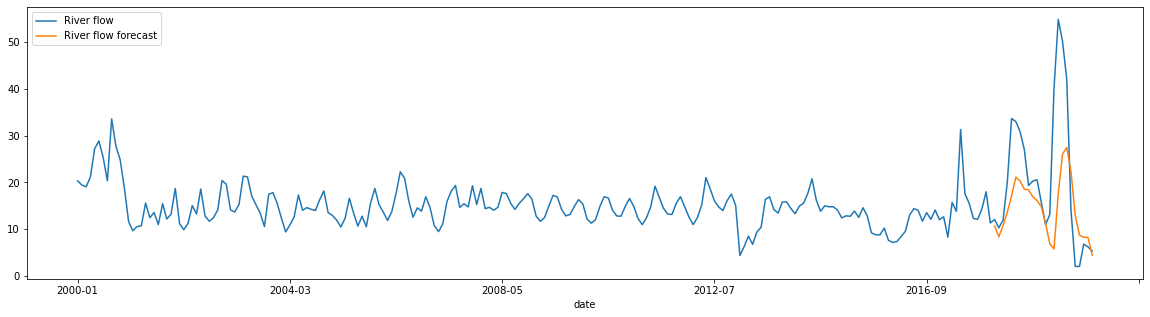


 ################ Basin 13 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00040: early stopping
Epoch 00022: early stopping
Epoch 00026: early stopping
Epoch 00021: early stopping
Epoch 00028: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0417 - rmse: 0.2041 - val_loss: 0.0834 - val_rmse: 0.2888
Epoch 2/100
15/15 - 0s - loss: 0.0279 - rmse: 0.1671 - val_loss: 0.0429 - val_rmse: 0.2071
Epoch 3/100
15/15 - 0s - loss: 0.0263 - rmse: 0.1620 - val_loss: 0.0461 - val_rmse: 0.2148
Epoch 4/100
15/15 - 0s - loss: 0.0227 - rmse: 0.1505 - val_loss: 0.0452 - val_rmse: 0.2125
Epoch 5/100
15/15 - 0s - loss: 0.0218 - rmse: 0.1476 - val_loss: 0.0426 - val_rmse: 0.2064
Epoch 6/100
15/15 - 0s - loss: 0.0195 - rmse: 0.1396 - val_loss: 0.0397 - val_rmse: 0.1992
Epoch 7/100
15/15 - 0s - loss: 0.0188 - rmse: 0.1371 - val_loss: 0.0379 - val_rmse: 0.1946
Epoch 8/100
15/15 - 0s - loss: 0.0172 - rmse: 0.1312 - val_loss: 0.0334 - val_rmse: 0.1826
Epoch 

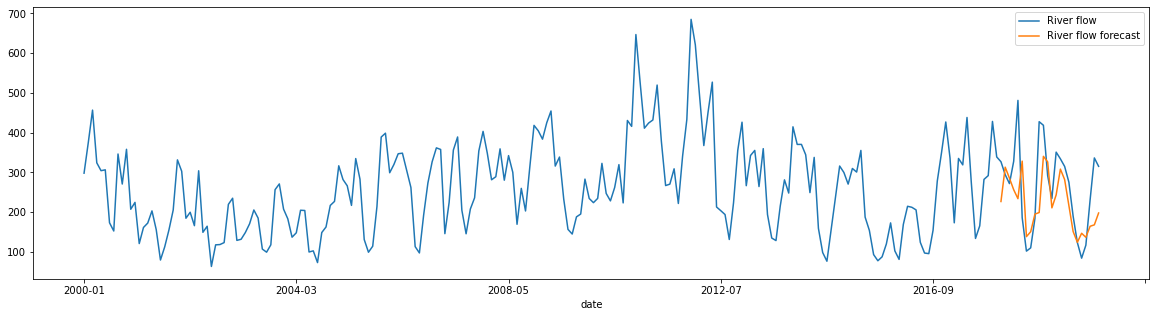


 ################ Basin 14 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00052: early stopping
Epoch 00021: early stopping
Epoch 00027: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0745 - rmse: 0.2729 - val_loss: 0.0568 - val_rmse: 0.2383
Epoch 2/100
15/15 - 0s - loss: 0.0476 - rmse: 0.2182 - val_loss: 0.0274 - val_rmse: 0.1655
Epoch 3/100
15/15 - 0s - loss: 0.0407 - rmse: 0.2018 - val_loss: 0.0282 - val_rmse: 0.1679
Epoch 4/100
15/15 - 0s - loss: 0.0341 - rmse: 0.1847 - val_loss: 0.0239 - val_rmse: 0.1544
Epoch 5/100
15/15 - 0s - loss: 0.0310 - rmse: 0.1761 - val_loss: 0.0239 - val_rmse: 0.1545
Epoch 6/100
15/15 - 0s - loss: 0.0287 - rmse: 0.1696 - val_loss: 0.0221 - val_rmse: 0.1485
Epoch 7/100
15/15 - 0s - loss: 0.0279 - rmse: 0.1671 - val_loss: 0.0224 - val_rmse: 0.1498
Epoch 8/100
15/15 - 0s - loss: 0.0273 - rmse: 0.1651 - val_loss: 0.0215 - val_rmse: 0.1467
Epoch 

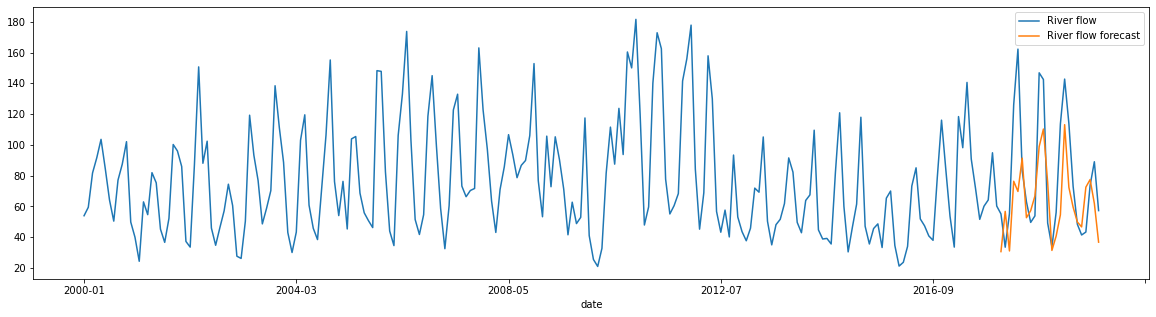


 ################ Basin 15 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00040: early stopping
Epoch 00022: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0624 - rmse: 0.2497 - val_loss: 0.0420 - val_rmse: 0.2049
Epoch 2/100
15/15 - 0s - loss: 0.0339 - rmse: 0.1841 - val_loss: 0.0139 - val_rmse: 0.1180
Epoch 3/100
15/15 - 0s - loss: 0.0319 - rmse: 0.1787 - val_loss: 0.0104 - val_rmse: 0.1022
Epoch 4/100
15/15 - 0s - loss: 0.0276 - rmse: 0.1660 - val_loss: 0.0085 - val_rmse: 0.0920
Epoch 5/100
15/15 - 0s - loss: 0.0248 - rmse: 0.1573 - val_loss: 0.0061 - val_rmse: 0.0784
Epoch 6/100
15/15 - 0s - loss: 0.0227 - rmse: 0.1507 - val_loss: 0.0054 - val_rmse: 0.0735
Epoch 7/100
15/15 - 0s - loss: 0.0213 - rmse: 0.1459 - val_loss: 0.0051 - val_rmse: 0.0712
Epoch 8/100
15/15 - 0s - loss: 0.0203 - rmse: 0.1425 - val_loss: 0.0050 - val_rmse: 0.0711
Epoch 

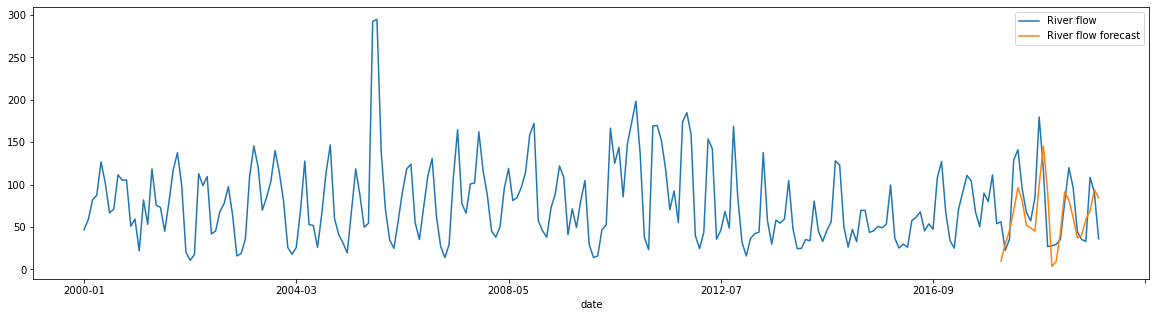


 ################ Basin 16 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00076: early stopping
Epoch 00021: early stopping
Epoch 00025: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
Epoch 00022: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0825 - rmse: 0.2873 - val_loss: 0.0535 - val_rmse: 0.2313
Epoch 2/100
15/15 - 0s - loss: 0.0447 - rmse: 0.2114 - val_loss: 0.0459 - val_rmse: 0.2143
Epoch 3/100
15/15 - 0s - loss: 0.0368 - rmse: 0.1918 - val_loss: 0.0225 - val_rmse: 0.1500
Epoch 4/100
15/15 - 0s - loss: 0.0342 - rmse: 0.1850 - val_loss: 0.0255 - val_rmse: 0.1598
Epoch 5/100
15/15 - 0s - loss: 0.0309 - rmse: 0.1758 - val_loss: 0.0218 - val_rmse: 0.1477
Epoch 6/100
15/15 - 0s - loss: 0.0287 - rmse: 0.1694 - val_loss: 0.0189 - val_rmse: 0.1375
Epoch 7/100
15/15 - 0s - loss: 0.0268 - rmse: 0.1636 - val_loss: 0.0179 - val_rmse: 0.1337
Epoch 8/100
15/15 - 0s - loss: 0.0252 - rmse: 0.1589 - val_loss: 0.0166 - val_rmse: 0.1289
Epoch 

Epoch 88/100
15/15 - 0s - loss: 0.0137 - rmse: 0.1169 - val_loss: 0.0114 - val_rmse: 0.1065
Epoch 89/100
15/15 - 0s - loss: 0.0136 - rmse: 0.1165 - val_loss: 0.0114 - val_rmse: 0.1066
Epoch 00089: early stopping
Test RMSE: 115.385
Mean Absolute Percentage Error: 21.962131941663365
Symmetric Mean Absolute Percentage Error: 10.077296990604708


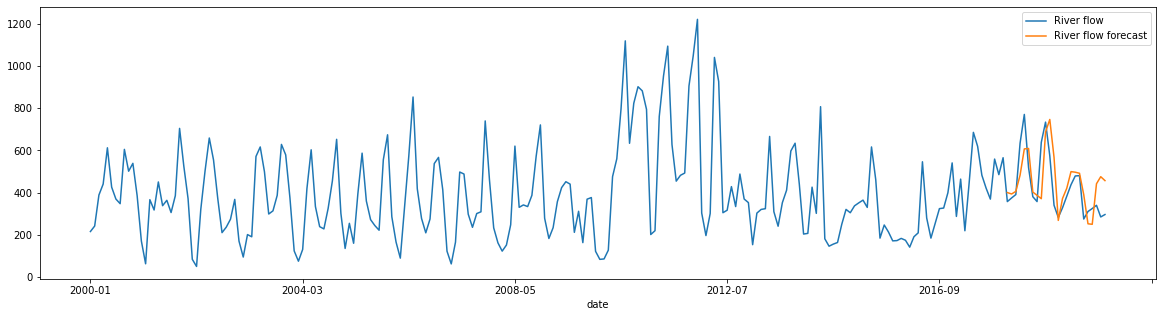


 ################ Basin 17 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
24 batch size
Epoch 1/100
8/8 - 1s - loss: 0.0484 - rmse: 0.2199 - val_loss: 0.0237 - val_rmse: 0.1539
Epoch 2/100
8/8 - 0s - loss: 0.0272 - rmse: 0.1650 - val_loss: 0.0305 - val_rmse: 0.1748
Epoch 3/100
8/8 - 0s - loss: 0.0212 - rmse: 0.1456 - val_loss: 0.0216 - val_rmse: 0.1471
Epoch 4/100
8/8 - 0s - loss: 0.0204 - rmse: 0.1428 - val_loss: 0.0249 - val_rmse: 0.1578
Epoch 5/100
8/8 - 0s - loss: 0.0199 - rmse: 0.1412 - val_loss: 0.0214 - val_rmse: 0.1463
Epoch 6/100
8/8 - 0s - loss: 0.0182 - rmse: 0.1350 - val_loss: 0.0189 - val_rmse: 0.1374
Epoch 7/100
8/8 - 0s - loss: 0.0173 - rmse: 0.1315 - val_loss: 0.0192 - val_rmse: 0.1385
Epoch 8/100
8/8 - 0s - loss: 0.0166 - rmse: 0.1289 - val_loss: 0.0193 - val_rmse: 0.1390
Epoch 9/100
8/8 - 0s - loss: 0.0159 - rmse: 0.1263

Epoch 90/100
8/8 - 0s - loss: 0.0097 - rmse: 0.0984 - val_loss: 0.0085 - val_rmse: 0.0924
Epoch 91/100
8/8 - 0s - loss: 0.0097 - rmse: 0.0983 - val_loss: 0.0085 - val_rmse: 0.0924
Epoch 92/100
8/8 - 0s - loss: 0.0096 - rmse: 0.0982 - val_loss: 0.0085 - val_rmse: 0.0924
Epoch 93/100
8/8 - 0s - loss: 0.0096 - rmse: 0.0981 - val_loss: 0.0085 - val_rmse: 0.0924
Epoch 94/100
8/8 - 0s - loss: 0.0096 - rmse: 0.0980 - val_loss: 0.0085 - val_rmse: 0.0924
Epoch 95/100
8/8 - 0s - loss: 0.0096 - rmse: 0.0979 - val_loss: 0.0085 - val_rmse: 0.0924
Epoch 96/100
8/8 - 0s - loss: 0.0096 - rmse: 0.0979 - val_loss: 0.0085 - val_rmse: 0.0925
Epoch 97/100
8/8 - 0s - loss: 0.0096 - rmse: 0.0978 - val_loss: 0.0086 - val_rmse: 0.0925
Epoch 98/100
8/8 - 0s - loss: 0.0095 - rmse: 0.0977 - val_loss: 0.0086 - val_rmse: 0.0925
Epoch 99/100
8/8 - 0s - loss: 0.0095 - rmse: 0.0976 - val_loss: 0.0086 - val_rmse: 0.0926
Epoch 100/100
8/8 - 0s - loss: 0.0095 - rmse: 0.0975 - val_loss: 0.0086 - val_rmse: 0.0926
Epoch 001

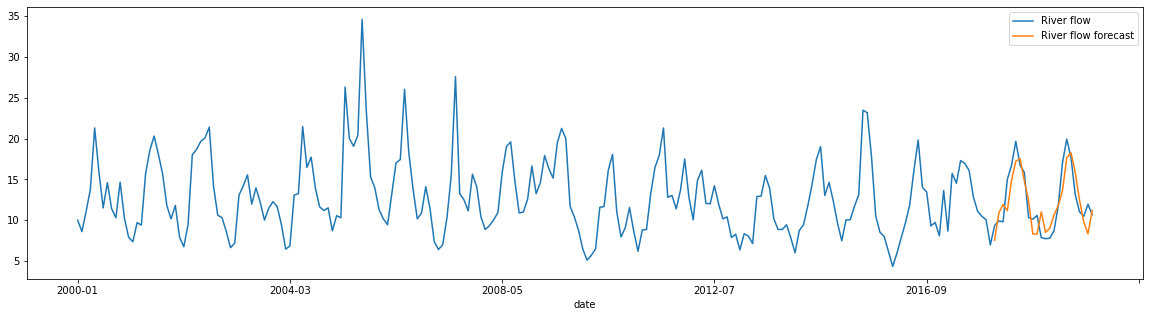


 ################ Basin 18 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00024: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
24 batch size
Epoch 1/100
8/8 - 1s - loss: 0.1033 - rmse: 0.3214 - val_loss: 0.0064 - val_rmse: 0.0797
Epoch 2/100
8/8 - 0s - loss: 0.0390 - rmse: 0.1975 - val_loss: 0.0515 - val_rmse: 0.2269
Epoch 3/100
8/8 - 0s - loss: 0.0343 - rmse: 0.1852 - val_loss: 0.0561 - val_rmse: 0.2369
Epoch 4/100
8/8 - 0s - loss: 0.0287 - rmse: 0.1696 - val_loss: 0.0280 - val_rmse: 0.1674
Epoch 5/100
8/8 - 0s - loss: 0.0276 - rmse: 0.1662 - val_loss: 0.0153 - val_rmse: 0.1236
Epoch 6/100
8/8 - 0s - loss: 0.0276 - rmse: 0.1660 - val_loss: 0.0145 - val_rmse: 0.1206
Epoch 7/100
8/8 - 0s - loss: 0.0253 - rmse: 0.1590 - val_loss: 0.0174 - val_rmse: 0.1320
Epoch 8/100
8/8 - 0s - loss: 0.0233 - rmse: 0.1526 - val_loss: 0.0173 - val_rmse: 0.1317
Epoch 9/100
8/8 - 0s - loss: 0.0219 - rmse: 0.1479

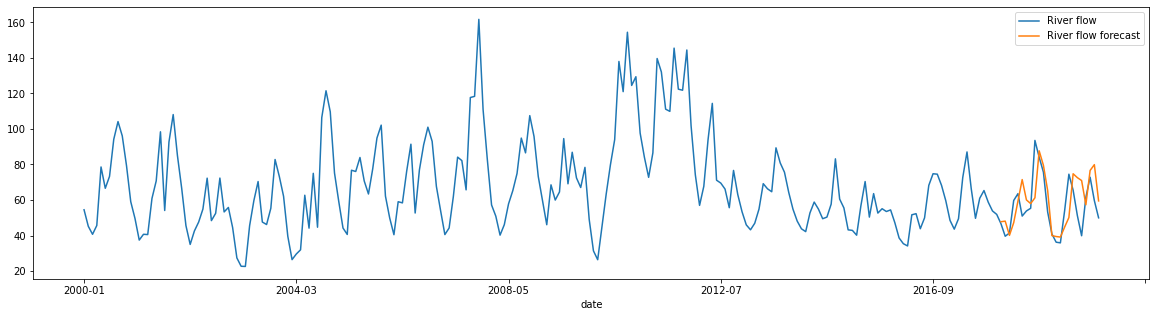


 ################ Basin 19 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00095: early stopping
Epoch 00033: early stopping
Epoch 00031: early stopping
Epoch 00021: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0301 - rmse: 0.1735 - val_loss: 0.0234 - val_rmse: 0.1530
Epoch 2/100
15/15 - 0s - loss: 0.0237 - rmse: 0.1538 - val_loss: 0.0089 - val_rmse: 0.0945
Epoch 3/100
15/15 - 0s - loss: 0.0190 - rmse: 0.1380 - val_loss: 0.0102 - val_rmse: 0.1008
Epoch 4/100
15/15 - 0s - loss: 0.0177 - rmse: 0.1331 - val_loss: 0.0070 - val_rmse: 0.0835
Epoch 5/100
15/15 - 0s - loss: 0.0160 - rmse: 0.1266 - val_loss: 0.0067 - val_rmse: 0.0818
Epoch 6/100
15/15 - 0s - loss: 0.0151 - rmse: 0.1229 - val_loss: 0.0061 - val_rmse: 0.0783
Epoch 7/100
15/15 - 0s - loss: 0.0143 - rmse: 0.1194 - val_loss: 0.0060 - val_rmse: 0.0772
Epoch 8/100
15/15 - 0s - loss: 0.0137 - rmse: 0.1171 - val_loss: 0.0059 - val_rmse: 0.0768
Epoch 

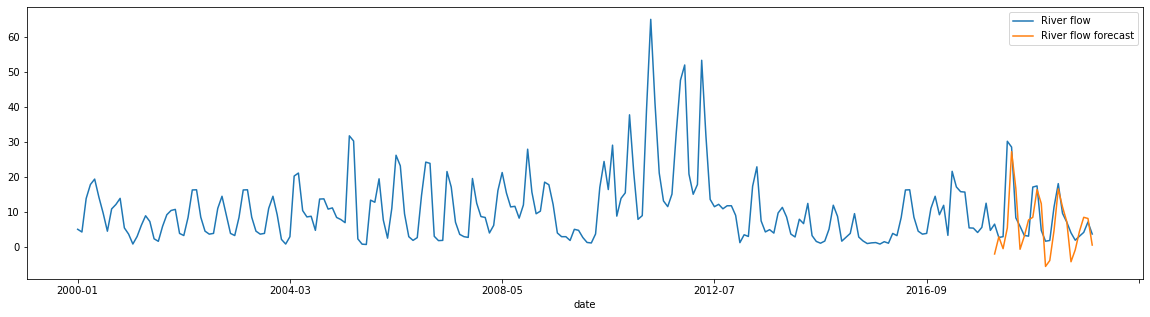


 ################ Basin 20 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00042: early stopping
Epoch 00022: early stopping
Epoch 00027: early stopping
Epoch 00021: early stopping
Epoch 00030: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0381 - rmse: 0.1952 - val_loss: 0.0461 - val_rmse: 0.2147
Epoch 2/100
15/15 - 0s - loss: 0.0207 - rmse: 0.1439 - val_loss: 0.0318 - val_rmse: 0.1783
Epoch 3/100
15/15 - 0s - loss: 0.0193 - rmse: 0.1389 - val_loss: 0.0289 - val_rmse: 0.1699
Epoch 4/100
15/15 - 0s - loss: 0.0173 - rmse: 0.1315 - val_loss: 0.0270 - val_rmse: 0.1643
Epoch 5/100
15/15 - 0s - loss: 0.0164 - rmse: 0.1282 - val_loss: 0.0255 - val_rmse: 0.1596
Epoch 6/100
15/15 - 0s - loss: 0.0153 - rmse: 0.1239 - val_loss: 0.0242 - val_rmse: 0.1556
Epoch 7/100
15/15 - 0s - loss: 0.0148 - rmse: 0.1218 - val_loss: 0.0231 - val_rmse: 0.1519
Epoch 8/100
15/15 - 0s - loss: 0.0142 - rmse: 0.1192 - val_loss: 0.0223 - val_rmse: 0.1494
Epoch 

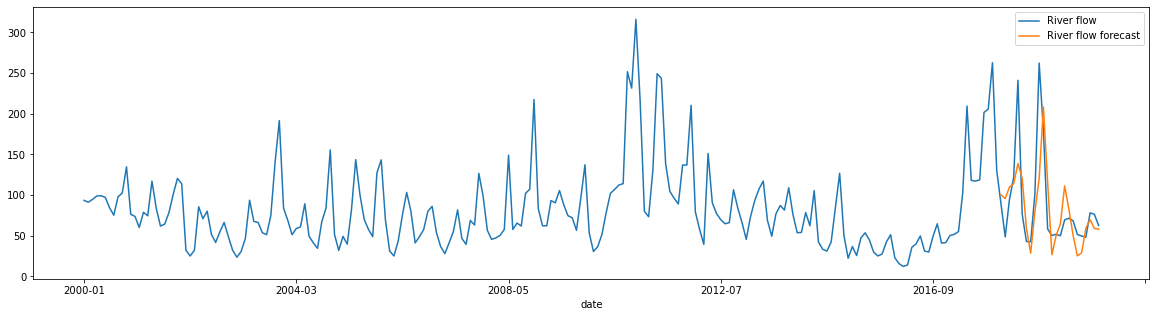


 ################ Basin 21 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00034: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0422 - rmse: 0.2055 - val_loss: 0.0393 - val_rmse: 0.1984
Epoch 2/100
15/15 - 0s - loss: 0.0255 - rmse: 0.1596 - val_loss: 0.0266 - val_rmse: 0.1630
Epoch 3/100
15/15 - 0s - loss: 0.0250 - rmse: 0.1582 - val_loss: 0.0255 - val_rmse: 0.1596
Epoch 4/100
15/15 - 0s - loss: 0.0228 - rmse: 0.1511 - val_loss: 0.0247 - val_rmse: 0.1571
Epoch 5/100
15/15 - 0s - loss: 0.0220 - rmse: 0.1483 - val_loss: 0.0238 - val_rmse: 0.1543
Epoch 6/100
15/15 - 0s - loss: 0.0208 - rmse: 0.1442 - val_loss: 0.0230 - val_rmse: 0.1518
Epoch 7/100
15/15 - 0s - loss: 0.0201 - rmse: 0.1418 - val_loss: 0.0224 - val_rmse: 0.1497
Epoch 8/100
15/15 - 0s - loss: 0.0193 - rmse: 0.1390 - val_loss: 0.0218 - val_rmse: 0.1477
Epoch 

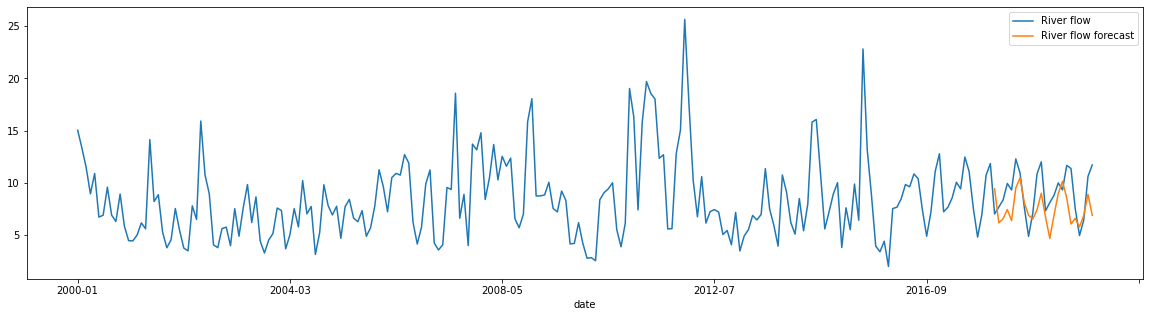


 ################ Basin 22 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00039: early stopping
Epoch 00024: early stopping
Epoch 00021: early stopping
Epoch 00023: early stopping
Epoch 00028: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0519 - rmse: 0.2278 - val_loss: 0.0226 - val_rmse: 0.1502
Epoch 2/100
15/15 - 0s - loss: 0.0287 - rmse: 0.1694 - val_loss: 0.0131 - val_rmse: 0.1143
Epoch 3/100
15/15 - 0s - loss: 0.0243 - rmse: 0.1558 - val_loss: 0.0091 - val_rmse: 0.0955
Epoch 4/100
15/15 - 0s - loss: 0.0195 - rmse: 0.1398 - val_loss: 0.0070 - val_rmse: 0.0839
Epoch 5/100
15/15 - 0s - loss: 0.0188 - rmse: 0.1372 - val_loss: 0.0063 - val_rmse: 0.0793
Epoch 6/100
15/15 - 0s - loss: 0.0174 - rmse: 0.1317 - val_loss: 0.0062 - val_rmse: 0.0787
Epoch 7/100
15/15 - 0s - loss: 0.0176 - rmse: 0.1327 - val_loss: 0.0058 - val_rmse: 0.0761
Epoch 8/100
15/15 - 0s - loss: 0.0167 - rmse: 0.1293 - val_loss: 0.0060 - val_rmse: 0.0774
Epoch 

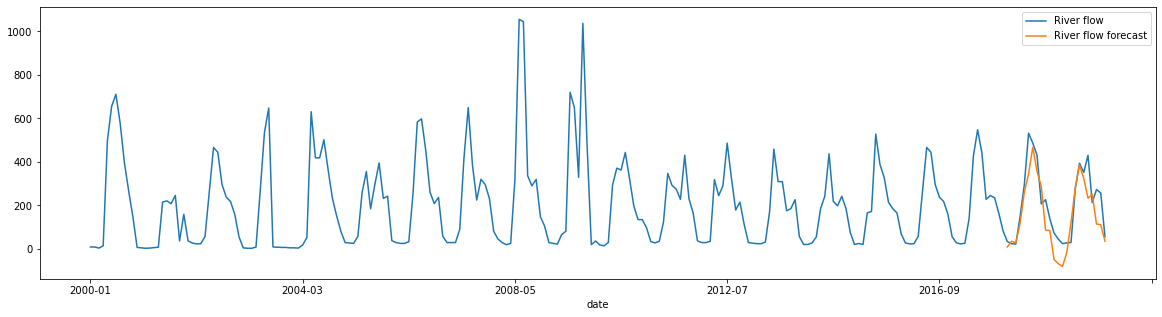


 ################ Basin 23 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00075: early stopping
Epoch 00021: early stopping
Epoch 00069: early stopping
Epoch 00021: early stopping
Epoch 00036: early stopping
Epoch 00021: early stopping
60 batch size
Epoch 1/100
3/3 - 1s - loss: 0.1253 - rmse: 0.3539 - val_loss: 0.0545 - val_rmse: 0.2334
Epoch 2/100
3/3 - 0s - loss: 0.0874 - rmse: 0.2956 - val_loss: 0.0565 - val_rmse: 0.2377
Epoch 3/100
3/3 - 0s - loss: 0.0719 - rmse: 0.2682 - val_loss: 0.0842 - val_rmse: 0.2902
Epoch 4/100
3/3 - 0s - loss: 0.0698 - rmse: 0.2641 - val_loss: 0.1072 - val_rmse: 0.3274
Epoch 5/100
3/3 - 0s - loss: 0.0690 - rmse: 0.2626 - val_loss: 0.1087 - val_rmse: 0.3298
Epoch 6/100
3/3 - 0s - loss: 0.0651 - rmse: 0.2551 - val_loss: 0.0948 - val_rmse: 0.3078
Epoch 7/100
3/3 - 0s - loss: 0.0598 - rmse: 0.2444 - val_loss: 0.0764 - val_rmse: 0.2764
Epoch 8/100
3/3 - 0s - loss: 0.0554 - rmse: 0.2353 - val_loss: 0.0609 - val_rmse: 0.2469
Epoch 9/100
3/3 - 0s -

Epoch 90/100
3/3 - 0s - loss: 0.0182 - rmse: 0.1348 - val_loss: 0.0176 - val_rmse: 0.1328
Epoch 91/100
3/3 - 0s - loss: 0.0181 - rmse: 0.1347 - val_loss: 0.0176 - val_rmse: 0.1326
Epoch 92/100
3/3 - 0s - loss: 0.0181 - rmse: 0.1345 - val_loss: 0.0175 - val_rmse: 0.1325
Epoch 93/100
3/3 - 0s - loss: 0.0181 - rmse: 0.1344 - val_loss: 0.0175 - val_rmse: 0.1323
Epoch 94/100
3/3 - 0s - loss: 0.0180 - rmse: 0.1343 - val_loss: 0.0175 - val_rmse: 0.1321
Epoch 95/100
3/3 - 0s - loss: 0.0180 - rmse: 0.1341 - val_loss: 0.0174 - val_rmse: 0.1320
Epoch 96/100
3/3 - 0s - loss: 0.0180 - rmse: 0.1340 - val_loss: 0.0174 - val_rmse: 0.1318
Epoch 97/100
3/3 - 0s - loss: 0.0179 - rmse: 0.1339 - val_loss: 0.0173 - val_rmse: 0.1317
Epoch 98/100
3/3 - 0s - loss: 0.0179 - rmse: 0.1337 - val_loss: 0.0173 - val_rmse: 0.1316
Epoch 99/100
3/3 - 0s - loss: 0.0179 - rmse: 0.1336 - val_loss: 0.0173 - val_rmse: 0.1314
Epoch 100/100
3/3 - 0s - loss: 0.0178 - rmse: 0.1335 - val_loss: 0.0172 - val_rmse: 0.1313
Test RMSE

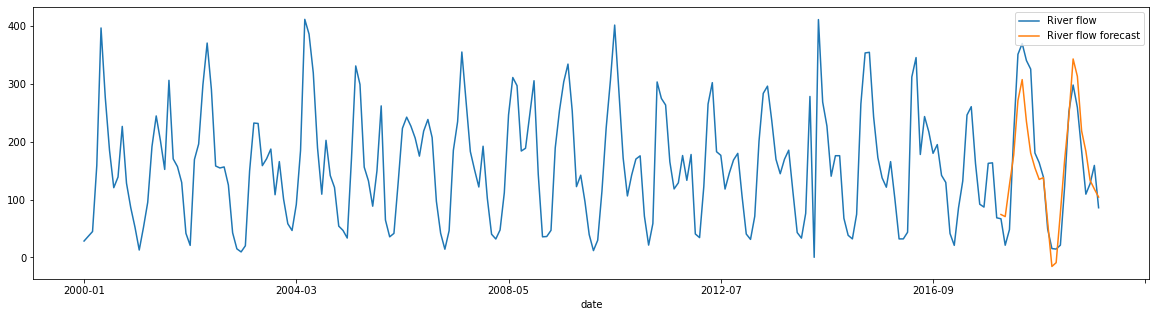


 ################ Basin 24 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00026: early stopping
Epoch 00021: early stopping
Epoch 00026: early stopping
Epoch 00021: early stopping
Epoch 00026: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0388 - rmse: 0.1971 - val_loss: 0.0202 - val_rmse: 0.1421
Epoch 2/100
15/15 - 0s - loss: 0.0225 - rmse: 0.1499 - val_loss: 0.0064 - val_rmse: 0.0801
Epoch 3/100
15/15 - 0s - loss: 0.0204 - rmse: 0.1430 - val_loss: 0.0045 - val_rmse: 0.0668
Epoch 4/100
15/15 - 0s - loss: 0.0175 - rmse: 0.1322 - val_loss: 0.0040 - val_rmse: 0.0629
Epoch 5/100
15/15 - 0s - loss: 0.0162 - rmse: 0.1271 - val_loss: 0.0042 - val_rmse: 0.0651
Epoch 6/100
15/15 - 0s - loss: 0.0148 - rmse: 0.1218 - val_loss: 0.0040 - val_rmse: 0.0636
Epoch 7/100
15/15 - 0s - loss: 0.0140 - rmse: 0.1185 - val_loss: 0.0040 - val_rmse: 0.0630
Epoch 8/100
15/15 - 0s - loss: 0.0133 - rmse: 0.1154 - val_loss: 0.0041 - val_rmse: 0.0636
Epoch 

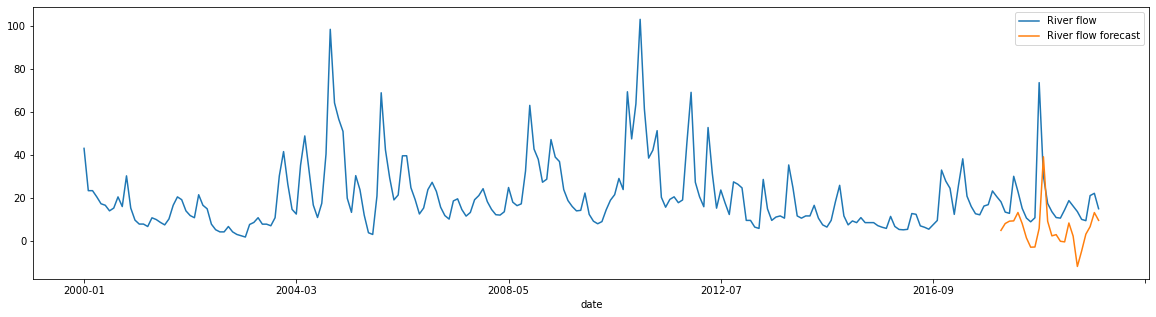


 ################ Basin 25 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00029: early stopping
Epoch 00048: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0282 - rmse: 0.1680 - val_loss: 0.0305 - val_rmse: 0.1746
Epoch 2/100
15/15 - 0s - loss: 0.0187 - rmse: 0.1367 - val_loss: 0.0086 - val_rmse: 0.0928
Epoch 3/100
15/15 - 0s - loss: 0.0185 - rmse: 0.1359 - val_loss: 0.0050 - val_rmse: 0.0706
Epoch 4/100
15/15 - 0s - loss: 0.0164 - rmse: 0.1279 - val_loss: 0.0045 - val_rmse: 0.0674
Epoch 5/100
15/15 - 0s - loss: 0.0158 - rmse: 0.1256 - val_loss: 0.0034 - val_rmse: 0.0582
Epoch 6/100
15/15 - 0s - loss: 0.0148 - rmse: 0.1218 - val_loss: 0.0031 - val_rmse: 0.0557
Epoch 7/100
15/15 - 0s - loss: 0.0143 - rmse: 0.1196 - val_loss: 0.0029 - val_rmse: 0.0542
Epoch 8/100
15/15 - 0s - loss: 0.0137 - rmse: 0.1172 - val_loss: 0.0029 - val_rmse: 0.0537
Epoch 

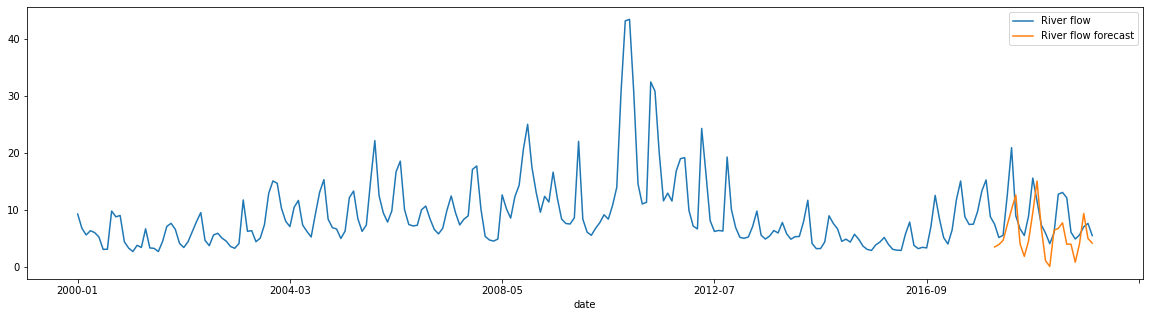


 ################ Basin 26 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00048: early stopping
Epoch 00039: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00061: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0293 - rmse: 0.1712 - val_loss: 0.0633 - val_rmse: 0.2515
Epoch 2/100
15/15 - 0s - loss: 0.0206 - rmse: 0.1435 - val_loss: 0.0233 - val_rmse: 0.1528
Epoch 3/100
15/15 - 0s - loss: 0.0180 - rmse: 0.1343 - val_loss: 0.0226 - val_rmse: 0.1504
Epoch 4/100
15/15 - 0s - loss: 0.0153 - rmse: 0.1239 - val_loss: 0.0135 - val_rmse: 0.1161
Epoch 5/100
15/15 - 0s - loss: 0.0143 - rmse: 0.1195 - val_loss: 0.0090 - val_rmse: 0.0948
Epoch 6/100
15/15 - 0s - loss: 0.0133 - rmse: 0.1153 - val_loss: 0.0071 - val_rmse: 0.0841
Epoch 7/100
15/15 - 0s - loss: 0.0128 - rmse: 0.1132 - val_loss: 0.0060 - val_rmse: 0.0777
Epoch 8/100
15/15 - 0s - loss: 0.0124 - rmse: 0.1115 - val_loss: 0.0057 - val_rmse: 0.0758
Epoch 

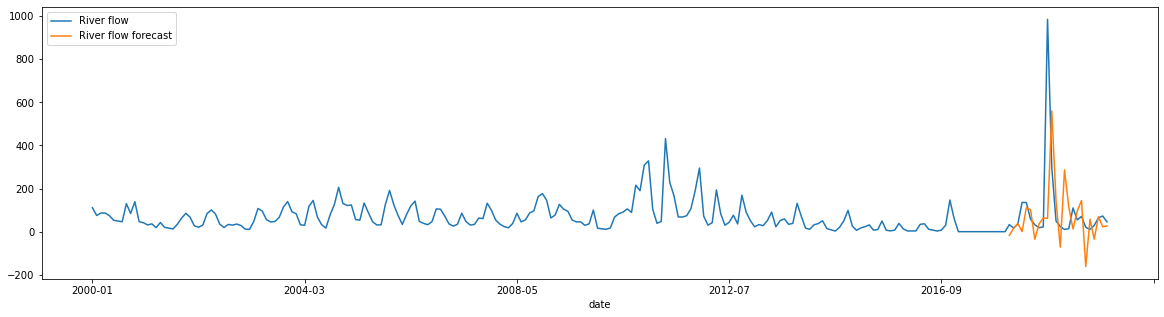


 ################ Basin 27 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00030: early stopping
Epoch 00023: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0281 - rmse: 0.1677 - val_loss: 0.0132 - val_rmse: 0.1148
Epoch 2/100
15/15 - 0s - loss: 0.0233 - rmse: 0.1528 - val_loss: 0.0058 - val_rmse: 0.0764
Epoch 3/100
15/15 - 0s - loss: 0.0207 - rmse: 0.1440 - val_loss: 0.0076 - val_rmse: 0.0874
Epoch 4/100
15/15 - 0s - loss: 0.0188 - rmse: 0.1371 - val_loss: 0.0054 - val_rmse: 0.0736
Epoch 5/100
15/15 - 0s - loss: 0.0178 - rmse: 0.1336 - val_loss: 0.0053 - val_rmse: 0.0725
Epoch 6/100
15/15 - 0s - loss: 0.0168 - rmse: 0.1295 - val_loss: 0.0050 - val_rmse: 0.0704
Epoch 7/100
15/15 - 0s - loss: 0.0160 - rmse: 0.1264 - val_loss: 0.0048 - val_rmse: 0.0695
Epoch 8/100
15/15 - 0s - loss: 0.0153 - rmse: 0.1235 - val_loss: 0.0047 - val_rmse: 0.0689
Epoch 

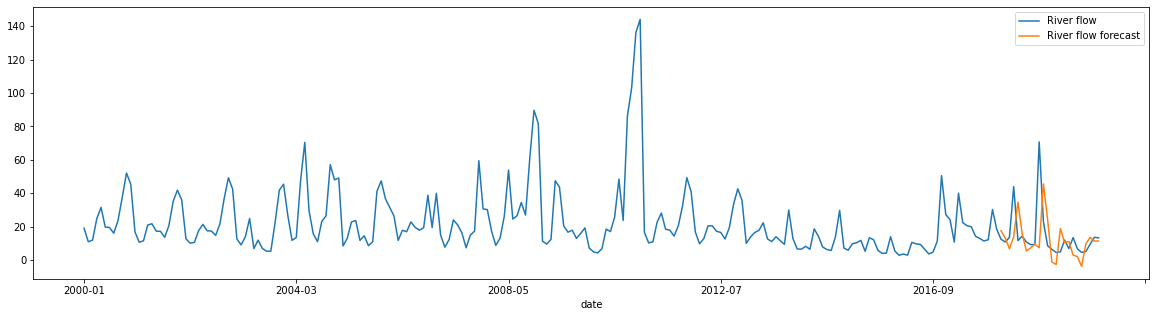


 ################ Basin 28 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00049: early stopping
Epoch 00022: early stopping
Epoch 00025: early stopping
Epoch 00037: early stopping
Epoch 00022: early stopping
Epoch 00036: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.1003 - rmse: 0.3167 - val_loss: 0.0518 - val_rmse: 0.2275
Epoch 2/100
15/15 - 0s - loss: 0.0539 - rmse: 0.2321 - val_loss: 0.0438 - val_rmse: 0.2092
Epoch 3/100
15/15 - 0s - loss: 0.0437 - rmse: 0.2090 - val_loss: 0.0394 - val_rmse: 0.1985
Epoch 4/100
15/15 - 0s - loss: 0.0401 - rmse: 0.2004 - val_loss: 0.0352 - val_rmse: 0.1876
Epoch 5/100
15/15 - 0s - loss: 0.0341 - rmse: 0.1846 - val_loss: 0.0334 - val_rmse: 0.1829
Epoch 6/100
15/15 - 0s - loss: 0.0303 - rmse: 0.1741 - val_loss: 0.0324 - val_rmse: 0.1800
Epoch 7/100
15/15 - 0s - loss: 0.0271 - rmse: 0.1646 - val_loss: 0.0318 - val_rmse: 0.1783
Epoch 8/100
15/15 - 0s - loss: 0.0247 - rmse: 0.1571 - val_loss: 0.0317 - val_rmse: 0.1779
Epoch 

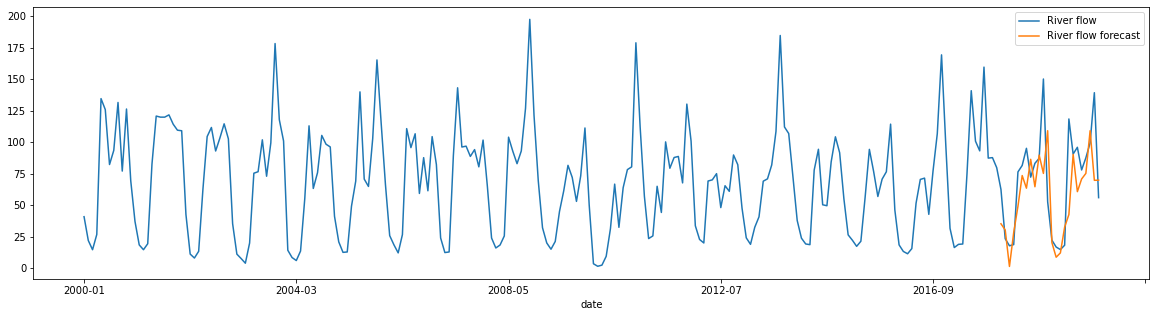


 ################ Basin 29 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00053: early stopping
Epoch 00021: early stopping
Epoch 00026: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
Epoch 00022: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0938 - rmse: 0.3063 - val_loss: 0.0451 - val_rmse: 0.2124
Epoch 2/100
15/15 - 0s - loss: 0.0445 - rmse: 0.2110 - val_loss: 0.0211 - val_rmse: 0.1454
Epoch 3/100
15/15 - 0s - loss: 0.0393 - rmse: 0.1982 - val_loss: 0.0108 - val_rmse: 0.1038
Epoch 4/100
15/15 - 0s - loss: 0.0387 - rmse: 0.1967 - val_loss: 0.0108 - val_rmse: 0.1040
Epoch 5/100
15/15 - 0s - loss: 0.0375 - rmse: 0.1936 - val_loss: 0.0109 - val_rmse: 0.1043
Epoch 6/100
15/15 - 0s - loss: 0.0373 - rmse: 0.1930 - val_loss: 0.0109 - val_rmse: 0.1045
Epoch 7/100
15/15 - 0s - loss: 0.0370 - rmse: 0.1923 - val_loss: 0.0110 - val_rmse: 0.1047
Epoch 8/100
15/15 - 0s - loss: 0.0367 - rmse: 0.1916 - val_loss: 0.0109 - val_rmse: 0.1046
Epoch 

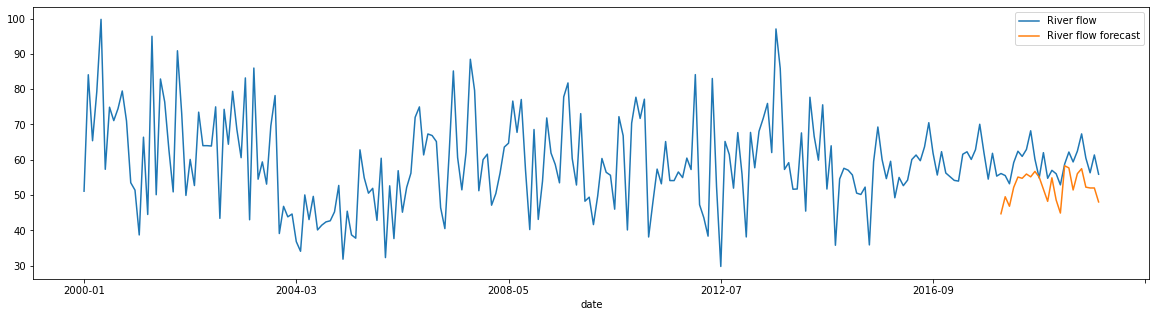


 ################ Basin 30 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00022: early stopping
Epoch 00040: early stopping
Epoch 00021: early stopping
Epoch 00025: early stopping
72 batch size
Epoch 1/100
3/3 - 1s - loss: 0.0378 - rmse: 0.1944 - val_loss: 0.0096 - val_rmse: 0.0982
Epoch 2/100
3/3 - 0s - loss: 0.0239 - rmse: 0.1546 - val_loss: 0.0106 - val_rmse: 0.1031
Epoch 3/100
3/3 - 0s - loss: 0.0214 - rmse: 0.1462 - val_loss: 0.0190 - val_rmse: 0.1377
Epoch 4/100
3/3 - 0s - loss: 0.0219 - rmse: 0.1480 - val_loss: 0.0198 - val_rmse: 0.1406
Epoch 5/100
3/3 - 0s - loss: 0.0207 - rmse: 0.1437 - val_loss: 0.0146 - val_rmse: 0.1207
Epoch 6/100
3/3 - 0s - loss: 0.0188 - rmse: 0.1370 - val_loss: 0.0094 - val_rmse: 0.0968
Epoch 7/100
3/3 - 0s - loss: 0.0179 - rmse: 0.1337 - val_loss: 0.0068 - val_rmse: 0.0823
Epoch 8/100
3/3 - 0s - loss: 0.0178 - rmse: 0.1336 - val_loss: 0.0060 - val_rmse: 0.0777
Epoch 9/100
3/3 - 0s -

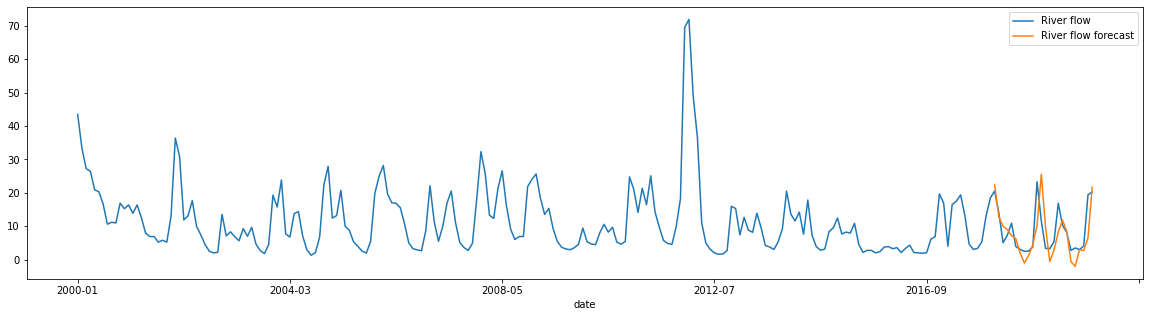


 ################ Basin 31 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00030: early stopping
Epoch 00024: early stopping
Epoch 00021: early stopping
Epoch 00026: early stopping
Epoch 00021: early stopping
Epoch 00031: early stopping
24 batch size
Epoch 1/100
8/8 - 1s - loss: 0.0848 - rmse: 0.2912 - val_loss: 0.0272 - val_rmse: 0.1650
Epoch 2/100
8/8 - 0s - loss: 0.0449 - rmse: 0.2119 - val_loss: 0.0829 - val_rmse: 0.2880
Epoch 3/100
8/8 - 0s - loss: 0.0376 - rmse: 0.1938 - val_loss: 0.0409 - val_rmse: 0.2022
Epoch 4/100
8/8 - 0s - loss: 0.0331 - rmse: 0.1819 - val_loss: 0.0179 - val_rmse: 0.1338
Epoch 5/100
8/8 - 0s - loss: 0.0337 - rmse: 0.1836 - val_loss: 0.0176 - val_rmse: 0.1327
Epoch 6/100
8/8 - 0s - loss: 0.0309 - rmse: 0.1757 - val_loss: 0.0228 - val_rmse: 0.1510
Epoch 7/100
8/8 - 0s - loss: 0.0291 - rmse: 0.1707 - val_loss: 0.0199 - val_rmse: 0.1412
Epoch 8/100
8/8 - 0s - loss: 0.0279 - rmse: 0.1671 - val_loss: 0.0146 - val_rmse: 0.1210
Epoch 9/100
8/8 - 0s -

Epoch 90/100
8/8 - 0s - loss: 0.0166 - rmse: 0.1287 - val_loss: 0.0100 - val_rmse: 0.1000
Epoch 91/100
8/8 - 0s - loss: 0.0165 - rmse: 0.1284 - val_loss: 0.0100 - val_rmse: 0.1001
Epoch 92/100
8/8 - 0s - loss: 0.0164 - rmse: 0.1281 - val_loss: 0.0100 - val_rmse: 0.1001
Epoch 93/100
8/8 - 0s - loss: 0.0163 - rmse: 0.1278 - val_loss: 0.0100 - val_rmse: 0.1001
Epoch 94/100
8/8 - 0s - loss: 0.0163 - rmse: 0.1276 - val_loss: 0.0100 - val_rmse: 0.1002
Epoch 95/100
8/8 - 0s - loss: 0.0162 - rmse: 0.1273 - val_loss: 0.0100 - val_rmse: 0.1002
Epoch 96/100
8/8 - 0s - loss: 0.0161 - rmse: 0.1270 - val_loss: 0.0101 - val_rmse: 0.1003
Epoch 97/100
8/8 - 0s - loss: 0.0161 - rmse: 0.1267 - val_loss: 0.0101 - val_rmse: 0.1003
Epoch 00097: early stopping
Test RMSE: 2.149
Mean Absolute Percentage Error: 21.681070940905546
Symmetric Mean Absolute Percentage Error: 9.57889402223449


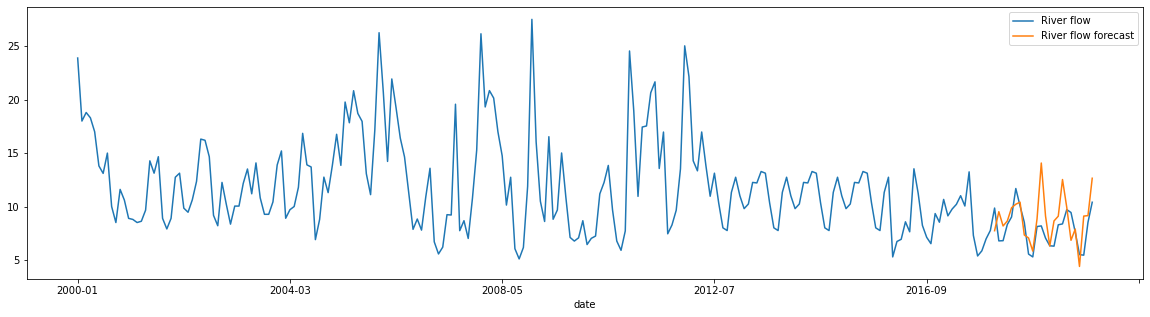


 ################ Basin 32 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00041: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0808 - rmse: 0.2842 - val_loss: 0.0472 - val_rmse: 0.2172
Epoch 2/100
15/15 - 0s - loss: 0.0458 - rmse: 0.2140 - val_loss: 0.0371 - val_rmse: 0.1927
Epoch 3/100
15/15 - 0s - loss: 0.0399 - rmse: 0.1997 - val_loss: 0.0247 - val_rmse: 0.1572
Epoch 4/100
15/15 - 0s - loss: 0.0378 - rmse: 0.1945 - val_loss: 0.0296 - val_rmse: 0.1719
Epoch 5/100
15/15 - 0s - loss: 0.0358 - rmse: 0.1893 - val_loss: 0.0253 - val_rmse: 0.1590
Epoch 6/100
15/15 - 0s - loss: 0.0350 - rmse: 0.1872 - val_loss: 0.0247 - val_rmse: 0.1571
Epoch 7/100
15/15 - 0s - loss: 0.0340 - rmse: 0.1843 - val_loss: 0.0238 - val_rmse: 0.1541
Epoch 8/100
15/15 - 0s - loss: 0.0331 - rmse: 0.1820 - val_loss: 0.0229 - val_rmse: 0.1514
Epoch 

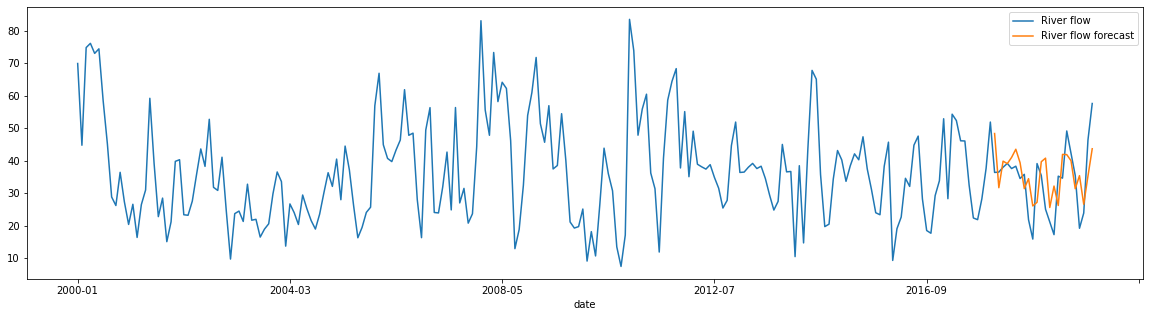


 ################ Basin 33 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00036: early stopping
Epoch 00076: early stopping
Epoch 00025: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00037: early stopping
36 batch size
Epoch 1/100
5/5 - 1s - loss: 0.0767 - rmse: 0.2769 - val_loss: 0.0350 - val_rmse: 0.1871
Epoch 2/100
5/5 - 0s - loss: 0.0358 - rmse: 0.1892 - val_loss: 0.0198 - val_rmse: 0.1407
Epoch 3/100
5/5 - 0s - loss: 0.0300 - rmse: 0.1733 - val_loss: 0.0332 - val_rmse: 0.1823
Epoch 4/100
5/5 - 0s - loss: 0.0326 - rmse: 0.1805 - val_loss: 0.0336 - val_rmse: 0.1832
Epoch 5/100
5/5 - 0s - loss: 0.0291 - rmse: 0.1705 - val_loss: 0.0227 - val_rmse: 0.1508
Epoch 6/100
5/5 - 0s - loss: 0.0253 - rmse: 0.1591 - val_loss: 0.0157 - val_rmse: 0.1251
Epoch 7/100
5/5 - 0s - loss: 0.0243 - rmse: 0.1560 - val_loss: 0.0134 - val_rmse: 0.1157
Epoch 8/100
5/5 - 0s - loss: 0.0236 - rmse: 0.1535 - val_loss: 0.0124 - val_rmse: 0.1115
Epoch 9/100
5/5 - 0s -

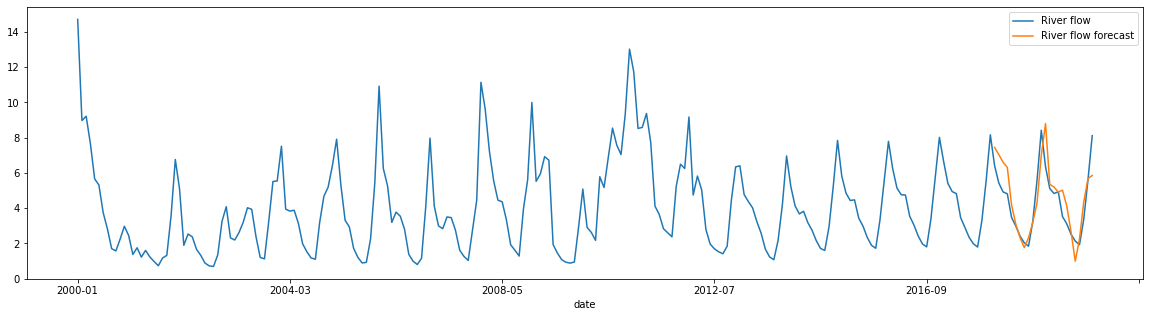


 ################ Basin 34 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00040: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0343 - rmse: 0.1852 - val_loss: 0.0346 - val_rmse: 0.1860
Epoch 2/100
15/15 - 0s - loss: 0.0174 - rmse: 0.1318 - val_loss: 0.0191 - val_rmse: 0.1382
Epoch 3/100
15/15 - 0s - loss: 0.0148 - rmse: 0.1217 - val_loss: 0.0164 - val_rmse: 0.1280
Epoch 4/100
15/15 - 0s - loss: 0.0118 - rmse: 0.1084 - val_loss: 0.0139 - val_rmse: 0.1179
Epoch 5/100
15/15 - 0s - loss: 0.0106 - rmse: 0.1029 - val_loss: 0.0121 - val_rmse: 0.1102
Epoch 6/100
15/15 - 0s - loss: 0.0097 - rmse: 0.0985 - val_loss: 0.0112 - val_rmse: 0.1061
Epoch 7/100
15/15 - 0s - loss: 0.0092 - rmse: 0.0961 - val_loss: 0.0106 - val_rmse: 0.1027
Epoch 8/100
15/15 - 0s - loss: 0.0089 - rmse: 0.0941 - val_loss: 0.0101 - val_rmse: 0.1005
Epoch 

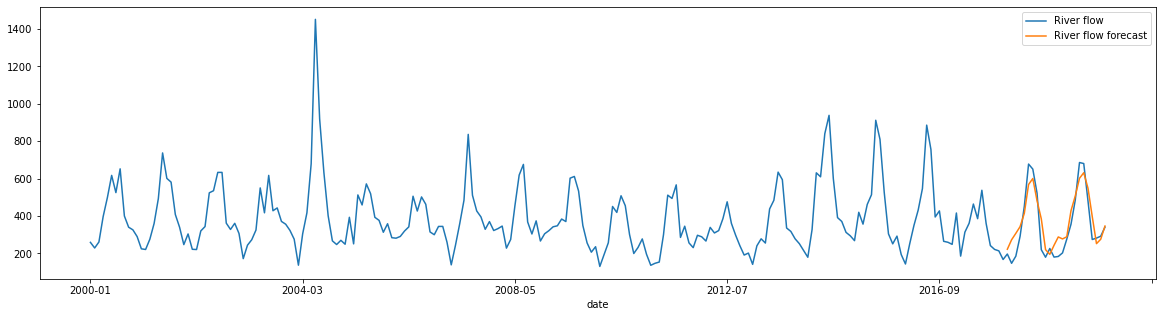


 ################ Basin 35 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00035: early stopping
Epoch 00024: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00028: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 5s - loss: 0.2013 - rmse: 0.4487 - val_loss: 0.0326 - val_rmse: 0.1805
Epoch 2/100
15/15 - 0s - loss: 0.0625 - rmse: 0.2500 - val_loss: 0.1127 - val_rmse: 0.3358
Epoch 3/100
15/15 - 0s - loss: 0.0390 - rmse: 0.1976 - val_loss: 0.0461 - val_rmse: 0.2146
Epoch 4/100
15/15 - 0s - loss: 0.0384 - rmse: 0.1961 - val_loss: 0.0325 - val_rmse: 0.1804
Epoch 5/100
15/15 - 0s - loss: 0.0365 - rmse: 0.1911 - val_loss: 0.0317 - val_rmse: 0.1781
Epoch 6/100
15/15 - 0s - loss: 0.0326 - rmse: 0.1806 - val_loss: 0.0269 - val_rmse: 0.1639
Epoch 7/100
15/15 - 0s - loss: 0.0305 - rmse: 0.1747 - val_loss: 0.0239 - val_rmse: 0.1546
Epoch 8/100
15/15 - 0s - loss: 0.0289 - rmse: 0.1699 - val_loss: 0.0226 - val_rmse: 0.1504
Epoch 

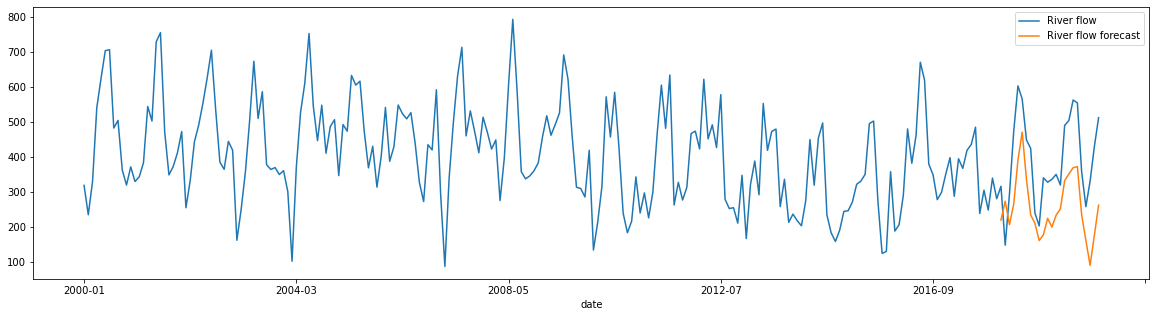


 ################ Basin 36 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00051: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 2s - loss: 0.0950 - rmse: 0.3083 - val_loss: 0.0706 - val_rmse: 0.2658
Epoch 2/100
15/15 - 0s - loss: 0.0589 - rmse: 0.2427 - val_loss: 0.0486 - val_rmse: 0.2205
Epoch 3/100
15/15 - 0s - loss: 0.0484 - rmse: 0.2201 - val_loss: 0.0380 - val_rmse: 0.1950
Epoch 4/100
15/15 - 0s - loss: 0.0380 - rmse: 0.1950 - val_loss: 0.0295 - val_rmse: 0.1716
Epoch 5/100
15/15 - 0s - loss: 0.0301 - rmse: 0.1734 - val_loss: 0.0240 - val_rmse: 0.1549
Epoch 6/100
15/15 - 0s - loss: 0.0244 - rmse: 0.1563 - val_loss: 0.0212 - val_rmse: 0.1455
Epoch 7/100
15/15 - 0s - loss: 0.0210 - rmse: 0.1449 - val_loss: 0.0201 - val_rmse: 0.1419
Epoch 8/100
15/15 - 0s - loss: 0.0191 - rmse: 0.1383 - val_loss: 0.0205 - val_rmse: 0.1433
Epoch 

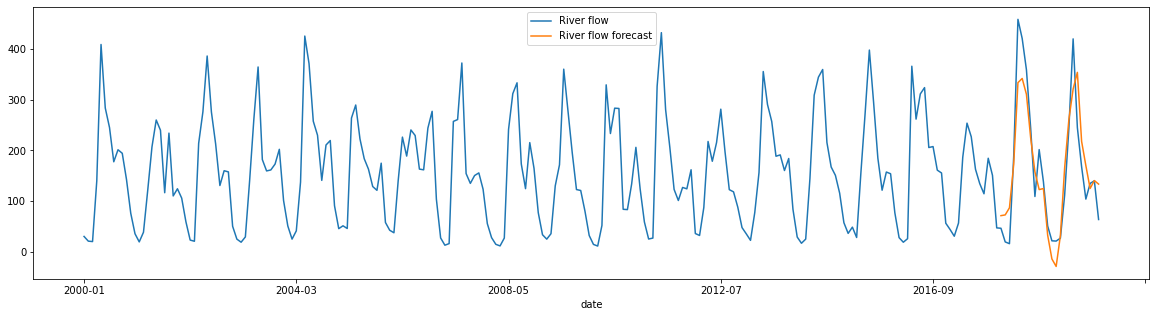


 ################ Basin 37 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00033: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0416 - rmse: 0.2039 - val_loss: 0.0334 - val_rmse: 0.1827
Epoch 2/100
15/15 - 0s - loss: 0.0292 - rmse: 0.1707 - val_loss: 0.0151 - val_rmse: 0.1230
Epoch 3/100
15/15 - 0s - loss: 0.0275 - rmse: 0.1659 - val_loss: 0.0148 - val_rmse: 0.1218
Epoch 4/100
15/15 - 0s - loss: 0.0250 - rmse: 0.1580 - val_loss: 0.0122 - val_rmse: 0.1107
Epoch 5/100
15/15 - 0s - loss: 0.0233 - rmse: 0.1528 - val_loss: 0.0104 - val_rmse: 0.1018
Epoch 6/100
15/15 - 0s - loss: 0.0219 - rmse: 0.1479 - val_loss: 0.0092 - val_rmse: 0.0959
Epoch 7/100
15/15 - 0s - loss: 0.0207 - rmse: 0.1439 - val_loss: 0.0082 - val_rmse: 0.0903
Epoch 8/100
15/15 - 0s - loss: 0.0198 - rmse: 0.1406 - val_loss: 0.0075 - val_rmse: 0.0864
Epoch 

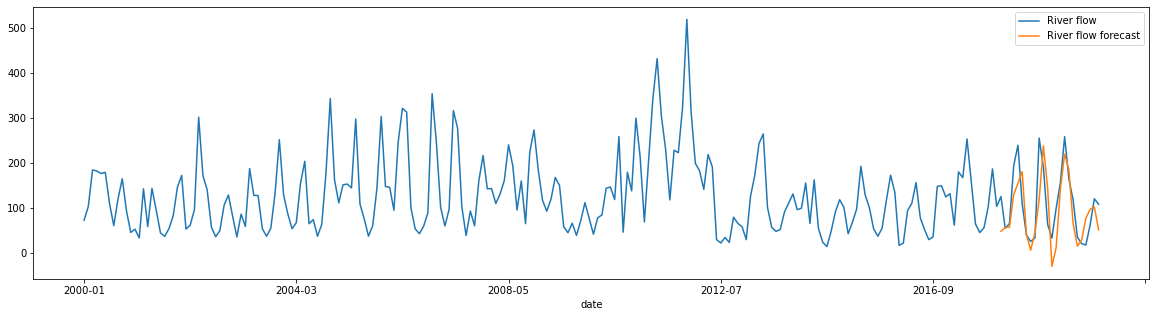


 ################ Basin 38 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00029: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.0245 - rmse: 0.1567 - val_loss: 0.0224 - val_rmse: 0.1498
Epoch 2/100
15/15 - 0s - loss: 0.0091 - rmse: 0.0954 - val_loss: 0.0085 - val_rmse: 0.0921
Epoch 3/100
15/15 - 0s - loss: 0.0083 - rmse: 0.0913 - val_loss: 0.0083 - val_rmse: 0.0913
Epoch 4/100
15/15 - 0s - loss: 0.0074 - rmse: 0.0863 - val_loss: 0.0073 - val_rmse: 0.0853
Epoch 5/100
15/15 - 0s - loss: 0.0070 - rmse: 0.0835 - val_loss: 0.0070 - val_rmse: 0.0835
Epoch 6/100
15/15 - 0s - loss: 0.0065 - rmse: 0.0807 - val_loss: 0.0065 - val_rmse: 0.0809
Epoch 7/100
15/15 - 0s - loss: 0.0062 - rmse: 0.0786 - val_loss: 0.0064 - val_rmse: 0.0800
Epoch 8/100
15/15 - 0s - loss: 0.0060 - rmse: 0.0772 - val_loss: 0.0063 - val_rmse: 0.0791
Epoch 

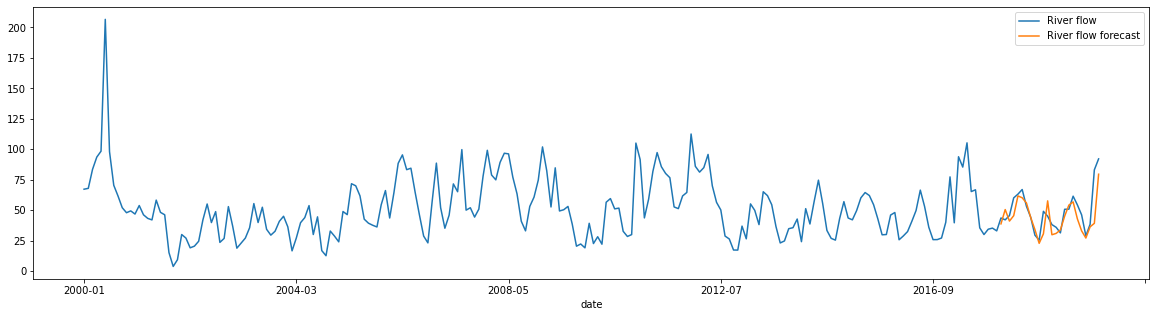


 ################ Basin 39 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00064: early stopping
Epoch 00021: early stopping
60 batch size
Epoch 1/100
3/3 - 5s - loss: 0.1264 - rmse: 0.3555 - val_loss: 0.0754 - val_rmse: 0.2745
Epoch 2/100
3/3 - 0s - loss: 0.0867 - rmse: 0.2945 - val_loss: 0.0515 - val_rmse: 0.2269
Epoch 3/100
3/3 - 0s - loss: 0.0702 - rmse: 0.2649 - val_loss: 0.0581 - val_rmse: 0.2410
Epoch 4/100
3/3 - 0s - loss: 0.0662 - rmse: 0.2574 - val_loss: 0.0691 - val_rmse: 0.2629
Epoch 5/100
3/3 - 0s - loss: 0.0640 - rmse: 0.2529 - val_loss: 0.0694 - val_rmse: 0.2635
Epoch 6/100
3/3 - 0s - loss: 0.0594 - rmse: 0.2438 - val_loss: 0.0611 - val_rmse: 0.2471
Epoch 7/100
3/3 - 0s - loss: 0.0537 - rmse: 0.2318 - val_loss: 0.0505 - val_rmse: 0.2248
Epoch 8/100
3/3 - 0s - loss: 0.0487 - rmse: 0.2207 - val_loss: 0.0423 - val_rmse: 0.2056
Epoch 9/100
3/3 - 0s - loss: 0.0453 - rmse: 0.2128 - val_loss: 0.0375 - val_rm

Epoch 90/100
3/3 - 0s - loss: 0.0117 - rmse: 0.1081 - val_loss: 0.0164 - val_rmse: 0.1279
Epoch 91/100
3/3 - 0s - loss: 0.0117 - rmse: 0.1079 - val_loss: 0.0163 - val_rmse: 0.1278
Epoch 92/100
3/3 - 0s - loss: 0.0116 - rmse: 0.1078 - val_loss: 0.0163 - val_rmse: 0.1277
Epoch 93/100
3/3 - 0s - loss: 0.0116 - rmse: 0.1077 - val_loss: 0.0163 - val_rmse: 0.1275
Epoch 94/100
3/3 - 0s - loss: 0.0116 - rmse: 0.1076 - val_loss: 0.0162 - val_rmse: 0.1274
Epoch 95/100
3/3 - 0s - loss: 0.0115 - rmse: 0.1074 - val_loss: 0.0162 - val_rmse: 0.1273
Epoch 96/100
3/3 - 0s - loss: 0.0115 - rmse: 0.1073 - val_loss: 0.0162 - val_rmse: 0.1271
Epoch 97/100
3/3 - 0s - loss: 0.0115 - rmse: 0.1072 - val_loss: 0.0161 - val_rmse: 0.1270
Epoch 98/100
3/3 - 0s - loss: 0.0115 - rmse: 0.1071 - val_loss: 0.0161 - val_rmse: 0.1269
Epoch 99/100
3/3 - 0s - loss: 0.0114 - rmse: 0.1069 - val_loss: 0.0161 - val_rmse: 0.1267
Epoch 100/100
3/3 - 0s - loss: 0.0114 - rmse: 0.1068 - val_loss: 0.0160 - val_rmse: 0.1266
Test RMSE

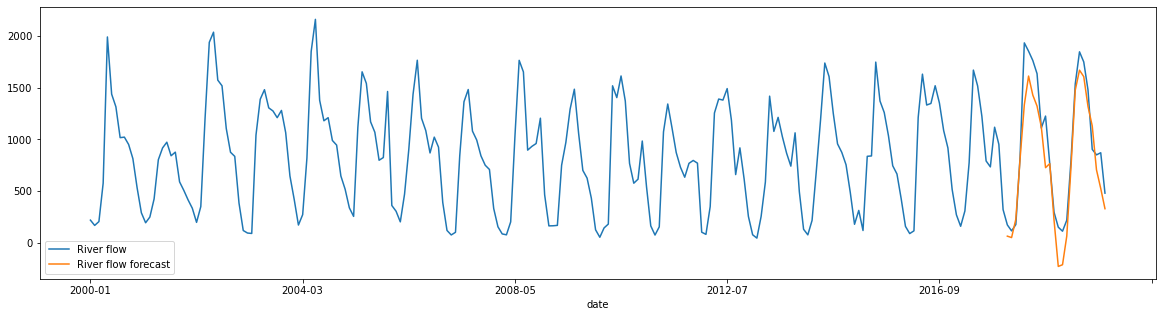


 ################ Basin 40 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00062: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
Epoch 00026: early stopping
Epoch 00021: early stopping
60 batch size
Epoch 1/100
3/3 - 1s - loss: 0.1326 - rmse: 0.3642 - val_loss: 0.1160 - val_rmse: 0.3406
Epoch 2/100
3/3 - 0s - loss: 0.0975 - rmse: 0.3122 - val_loss: 0.0823 - val_rmse: 0.2869
Epoch 3/100
3/3 - 0s - loss: 0.0805 - rmse: 0.2837 - val_loss: 0.0766 - val_rmse: 0.2767
Epoch 4/100
3/3 - 0s - loss: 0.0750 - rmse: 0.2740 - val_loss: 0.0808 - val_rmse: 0.2843
Epoch 5/100
3/3 - 0s - loss: 0.0721 - rmse: 0.2685 - val_loss: 0.0800 - val_rmse: 0.2828
Epoch 6/100
3/3 - 0s - loss: 0.0673 - rmse: 0.2594 - val_loss: 0.0724 - val_rmse: 0.2691
Epoch 7/100
3/3 - 0s - loss: 0.0611 - rmse: 0.2473 - val_loss: 0.0627 - val_rmse: 0.2504
Epoch 8/100
3/3 - 0s - loss: 0.0553 - rmse: 0.2352 - val_loss: 0.0546 - val_rmse: 0.2337
Epoch 9/100
3/3 - 0s - loss: 0.0508 - rmse: 0.2255

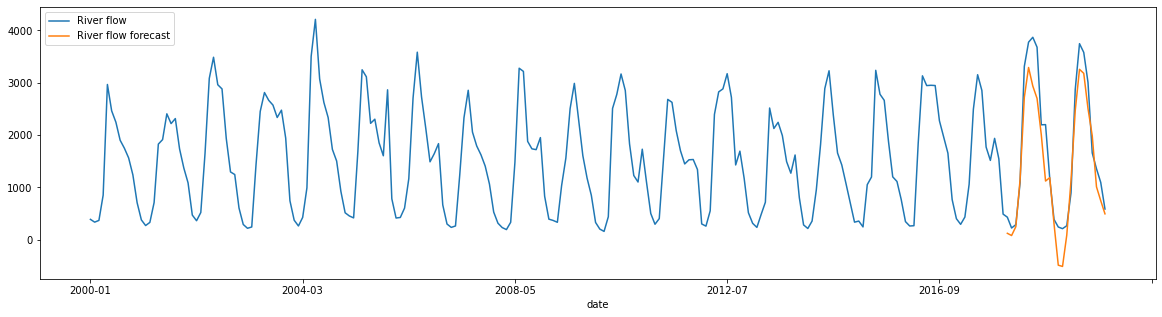


 ################ Basin 41 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00052: early stopping
Epoch 00021: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
Epoch 00028: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.1267 - rmse: 0.3559 - val_loss: 0.0737 - val_rmse: 0.2715
Epoch 2/100
15/15 - 0s - loss: 0.0686 - rmse: 0.2620 - val_loss: 0.0420 - val_rmse: 0.2049
Epoch 3/100
15/15 - 0s - loss: 0.0443 - rmse: 0.2104 - val_loss: 0.0252 - val_rmse: 0.1586
Epoch 4/100
15/15 - 0s - loss: 0.0277 - rmse: 0.1663 - val_loss: 0.0174 - val_rmse: 0.1320
Epoch 5/100
15/15 - 0s - loss: 0.0204 - rmse: 0.1427 - val_loss: 0.0161 - val_rmse: 0.1269
Epoch 6/100
15/15 - 0s - loss: 0.0179 - rmse: 0.1337 - val_loss: 0.0155 - val_rmse: 0.1243
Epoch 7/100
15/15 - 0s - loss: 0.0163 - rmse: 0.1276 - val_loss: 0.0135 - val_rmse: 0.1162
Epoch 8/100
15/15 - 0s - loss: 0.0153 - rmse: 0.1239 - val_loss: 0.0127 - val_rmse: 0.1126
Epoch 

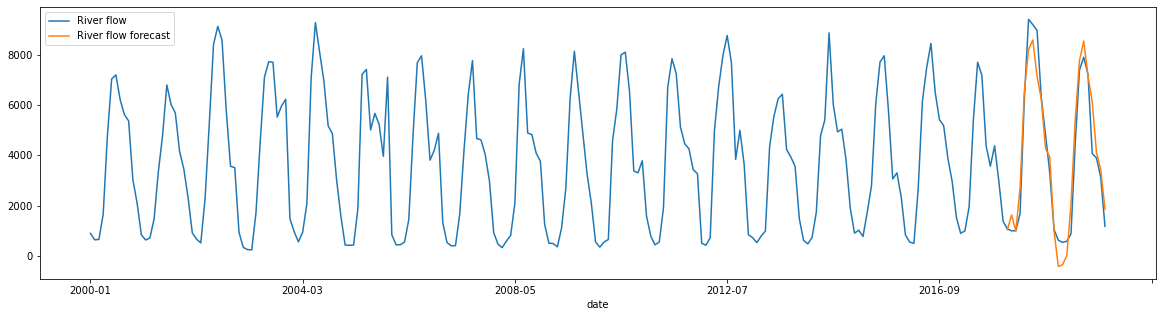


 ################ Basin 42 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00031: early stopping
Epoch 00022: early stopping
Epoch 00068: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
Epoch 00022: early stopping
36 batch size
Epoch 1/100
5/5 - 1s - loss: 0.1838 - rmse: 0.4287 - val_loss: 0.0850 - val_rmse: 0.2916
Epoch 2/100
5/5 - 0s - loss: 0.0963 - rmse: 0.3104 - val_loss: 0.0652 - val_rmse: 0.2553
Epoch 3/100
5/5 - 0s - loss: 0.0721 - rmse: 0.2686 - val_loss: 0.1085 - val_rmse: 0.3294
Epoch 4/100
5/5 - 0s - loss: 0.0704 - rmse: 0.2654 - val_loss: 0.1200 - val_rmse: 0.3464
Epoch 5/100
5/5 - 0s - loss: 0.0626 - rmse: 0.2502 - val_loss: 0.0928 - val_rmse: 0.3047
Epoch 6/100
5/5 - 0s - loss: 0.0525 - rmse: 0.2292 - val_loss: 0.0635 - val_rmse: 0.2519
Epoch 7/100
5/5 - 0s - loss: 0.0471 - rmse: 0.2171 - val_loss: 0.0469 - val_rmse: 0.2166
Epoch 8/100
5/5 - 0s - loss: 0.0447 - rmse: 0.2114 - val_loss: 0.0398 - val_rmse: 0.1996
Epoch 9/100
5/5 - 0s -

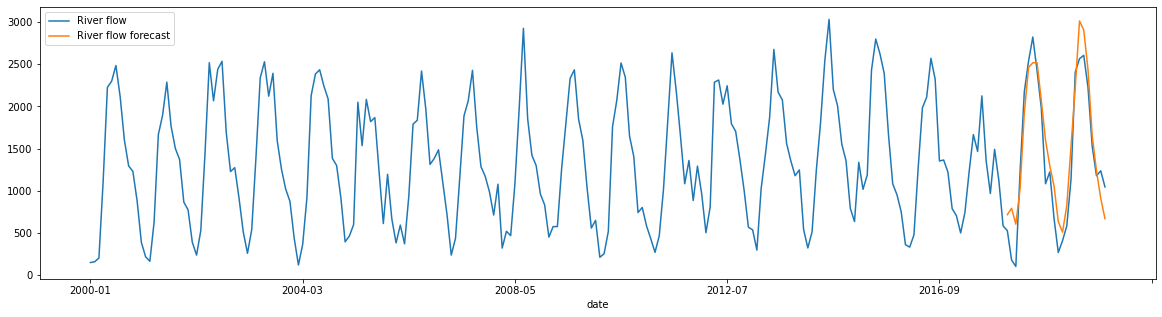


 ################ Basin 43 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00061: early stopping
Epoch 00021: early stopping
Epoch 00026: early stopping
Epoch 00021: early stopping
Epoch 00024: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 7s - loss: 0.1242 - rmse: 0.3524 - val_loss: 0.0681 - val_rmse: 0.2609
Epoch 2/100
15/15 - 0s - loss: 0.0397 - rmse: 0.1993 - val_loss: 0.0569 - val_rmse: 0.2386
Epoch 3/100
15/15 - 0s - loss: 0.0279 - rmse: 0.1671 - val_loss: 0.0453 - val_rmse: 0.2128
Epoch 4/100
15/15 - 0s - loss: 0.0285 - rmse: 0.1690 - val_loss: 0.0448 - val_rmse: 0.2117
Epoch 5/100
15/15 - 0s - loss: 0.0266 - rmse: 0.1630 - val_loss: 0.0453 - val_rmse: 0.2127
Epoch 6/100
15/15 - 0s - loss: 0.0261 - rmse: 0.1617 - val_loss: 0.0457 - val_rmse: 0.2138
Epoch 7/100
15/15 - 0s - loss: 0.0258 - rmse: 0.1605 - val_loss: 0.0451 - val_rmse: 0.2123
Epoch 8/100
15/15 - 0s - loss: 0.0253 - rmse: 0.1592 - val_loss: 0.0447 - val_rmse: 0.2115
Epoch 

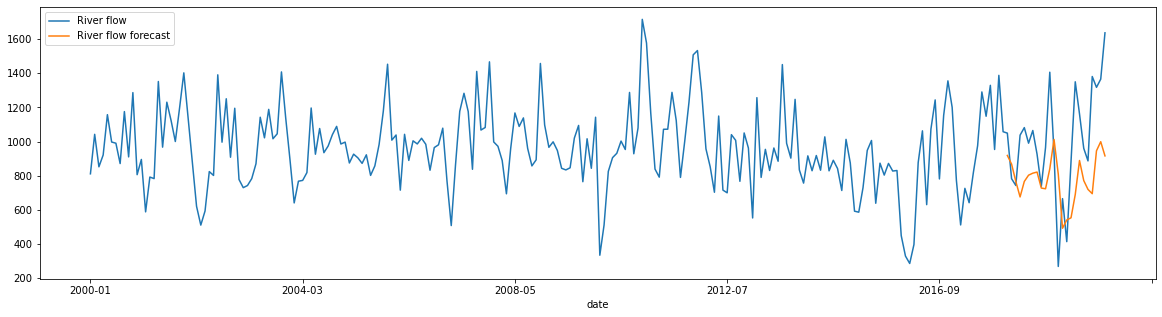


 ################ Basin 44 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00046: early stopping
Epoch 00022: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
Epoch 00023: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 1s - loss: 0.1265 - rmse: 0.3557 - val_loss: 0.0721 - val_rmse: 0.2686
Epoch 2/100
15/15 - 0s - loss: 0.0420 - rmse: 0.2050 - val_loss: 0.0470 - val_rmse: 0.2167
Epoch 3/100
15/15 - 0s - loss: 0.0352 - rmse: 0.1877 - val_loss: 0.0414 - val_rmse: 0.2036
Epoch 4/100
15/15 - 0s - loss: 0.0330 - rmse: 0.1818 - val_loss: 0.0401 - val_rmse: 0.2004
Epoch 5/100
15/15 - 0s - loss: 0.0312 - rmse: 0.1765 - val_loss: 0.0400 - val_rmse: 0.1999
Epoch 6/100
15/15 - 0s - loss: 0.0304 - rmse: 0.1743 - val_loss: 0.0391 - val_rmse: 0.1979
Epoch 7/100
15/15 - 0s - loss: 0.0294 - rmse: 0.1714 - val_loss: 0.0382 - val_rmse: 0.1955
Epoch 8/100
15/15 - 0s - loss: 0.0285 - rmse: 0.1689 - val_loss: 0.0372 - val_rmse: 0.1928
Epoch 

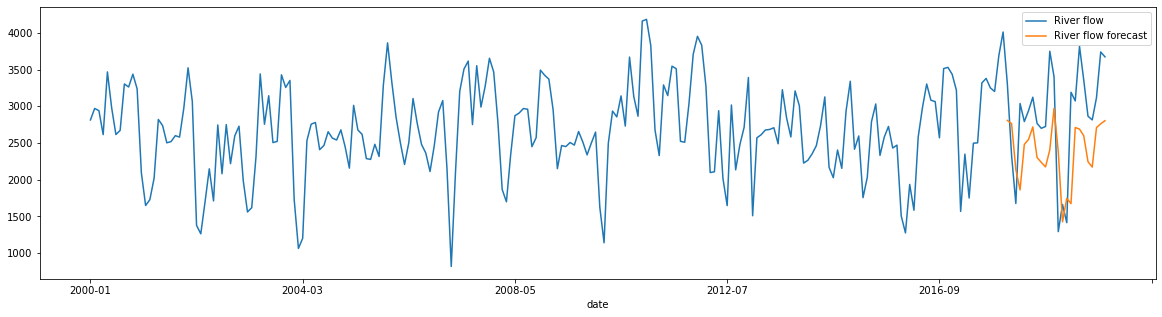


 ################ Basin 45 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00045: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
24 batch size
Epoch 1/100
8/8 - 2s - loss: 0.1139 - rmse: 0.3375 - val_loss: 0.0735 - val_rmse: 0.2712
Epoch 2/100
8/8 - 0s - loss: 0.0696 - rmse: 0.2638 - val_loss: 0.0678 - val_rmse: 0.2604
Epoch 3/100
8/8 - 0s - loss: 0.0573 - rmse: 0.2393 - val_loss: 0.0523 - val_rmse: 0.2287
Epoch 4/100
8/8 - 0s - loss: 0.0466 - rmse: 0.2158 - val_loss: 0.0388 - val_rmse: 0.1969
Epoch 5/100
8/8 - 0s - loss: 0.0414 - rmse: 0.2034 - val_loss: 0.0320 - val_rmse: 0.1789
Epoch 6/100
8/8 - 0s - loss: 0.0360 - rmse: 0.1897 - val_loss: 0.0252 - val_rmse: 0.1586
Epoch 7/100
8/8 - 0s - loss: 0.0306 - rmse: 0.1749 - val_loss: 0.0204 - val_rmse: 0.1427
Epoch 8/100
8/8 - 0s - loss: 0.0265 - rmse: 0.1628 - val_loss: 0.0169 - val_rmse: 0.1301
Epoch 9/100
8/8 - 0s -

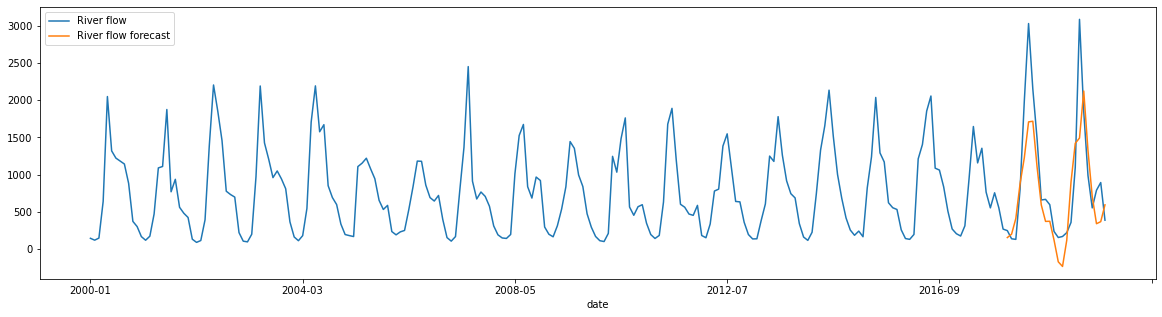


 ################ Basin 46 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00021: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
12 batch size
Epoch 1/100
15/15 - 2s - loss: 0.0942 - rmse: 0.3069 - val_loss: 0.0652 - val_rmse: 0.2553
Epoch 2/100
15/15 - 0s - loss: 0.0510 - rmse: 0.2258 - val_loss: 0.0419 - val_rmse: 0.2047
Epoch 3/100
15/15 - 0s - loss: 0.0381 - rmse: 0.1952 - val_loss: 0.0305 - val_rmse: 0.1747
Epoch 4/100
15/15 - 0s - loss: 0.0289 - rmse: 0.1700 - val_loss: 0.0212 - val_rmse: 0.1457
Epoch 5/100
15/15 - 0s - loss: 0.0226 - rmse: 0.1503 - val_loss: 0.0190 - val_rmse: 0.1378
Epoch 6/100
15/15 - 0s - loss: 0.0195 - rmse: 0.1398 - val_loss: 0.0185 - val_rmse: 0.1360
Epoch 7/100
15/15 - 0s - loss: 0.0175 - rmse: 0.1321 - val_loss: 0.0175 - val_rmse: 0.1322
Epoch 8/100
15/15 - 0s - loss: 0.0163 - rmse: 0.1276 - val_loss: 0.0177 - val_rmse: 0.1331
Epoch 9/100
15/15 - 0s - loss: 0.0

Epoch 88/100
15/15 - 0s - loss: 0.0097 - rmse: 0.0985 - val_loss: 0.0122 - val_rmse: 0.1104
Epoch 89/100
15/15 - 0s - loss: 0.0097 - rmse: 0.0984 - val_loss: 0.0122 - val_rmse: 0.1104
Epoch 90/100
15/15 - 0s - loss: 0.0097 - rmse: 0.0983 - val_loss: 0.0122 - val_rmse: 0.1105
Epoch 91/100
15/15 - 0s - loss: 0.0097 - rmse: 0.0982 - val_loss: 0.0122 - val_rmse: 0.1105
Epoch 00091: early stopping
Test RMSE: 919.480
Mean Absolute Percentage Error: 81.91442290817322
Symmetric Mean Absolute Percentage Error: 21.598701157605152


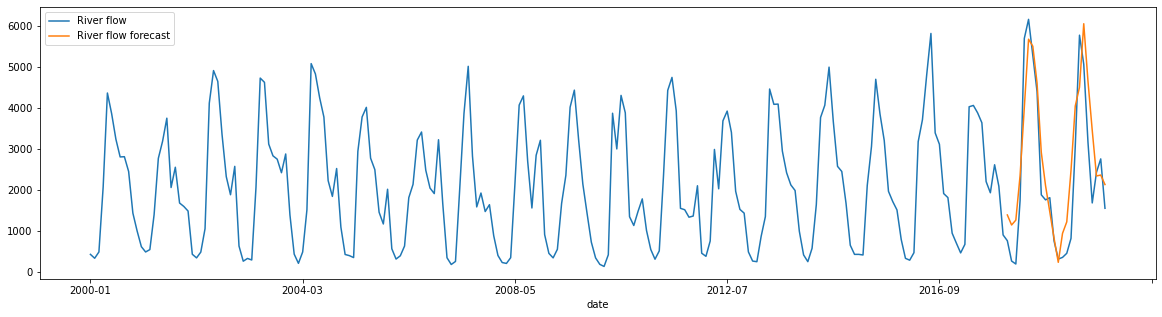


 ################ Basin 47 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00061: early stopping
Epoch 00022: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00022: early stopping
24 batch size
Epoch 1/100
8/8 - 1s - loss: 0.1908 - rmse: 0.4368 - val_loss: 0.1176 - val_rmse: 0.3429
Epoch 2/100
8/8 - 0s - loss: 0.1037 - rmse: 0.3220 - val_loss: 0.0960 - val_rmse: 0.3098
Epoch 3/100
8/8 - 0s - loss: 0.0816 - rmse: 0.2856 - val_loss: 0.0849 - val_rmse: 0.2914
Epoch 4/100
8/8 - 0s - loss: 0.0659 - rmse: 0.2567 - val_loss: 0.0629 - val_rmse: 0.2509
Epoch 5/100
8/8 - 0s - loss: 0.0559 - rmse: 0.2365 - val_loss: 0.0495 - val_rmse: 0.2225
Epoch 6/100
8/8 - 0s - loss: 0.0488 - rmse: 0.2208 - val_loss: 0.0398 - val_rmse: 0.1995
Epoch 7/100
8/8 - 0s - loss: 0.0406 - rmse: 0.2015 - val_loss: 0.0316 - val_rmse: 0.1778
Epoch 8/100
8/8 - 0s - loss: 0.0328 - rmse: 0.1811 - val_loss: 0.0253 - val_rmse: 0.1591
Epoch 9/100
8/8 - 0s -

Epoch 90/100
8/8 - 0s - loss: 0.0057 - rmse: 0.0758 - val_loss: 0.0062 - val_rmse: 0.0786
Epoch 91/100
8/8 - 0s - loss: 0.0057 - rmse: 0.0757 - val_loss: 0.0062 - val_rmse: 0.0785
Epoch 92/100
8/8 - 0s - loss: 0.0057 - rmse: 0.0756 - val_loss: 0.0062 - val_rmse: 0.0785
Epoch 93/100
8/8 - 0s - loss: 0.0057 - rmse: 0.0755 - val_loss: 0.0062 - val_rmse: 0.0784
Epoch 94/100
8/8 - 0s - loss: 0.0057 - rmse: 0.0754 - val_loss: 0.0061 - val_rmse: 0.0784
Epoch 95/100
8/8 - 0s - loss: 0.0057 - rmse: 0.0753 - val_loss: 0.0061 - val_rmse: 0.0783
Epoch 96/100
8/8 - 0s - loss: 0.0057 - rmse: 0.0752 - val_loss: 0.0061 - val_rmse: 0.0783
Epoch 97/100
8/8 - 0s - loss: 0.0056 - rmse: 0.0751 - val_loss: 0.0061 - val_rmse: 0.0782
Epoch 98/100
8/8 - 0s - loss: 0.0056 - rmse: 0.0750 - val_loss: 0.0061 - val_rmse: 0.0782
Epoch 99/100
8/8 - 0s - loss: 0.0056 - rmse: 0.0749 - val_loss: 0.0061 - val_rmse: 0.0781
Epoch 100/100
8/8 - 0s - loss: 0.0056 - rmse: 0.0748 - val_loss: 0.0061 - val_rmse: 0.0781
Test RMSE

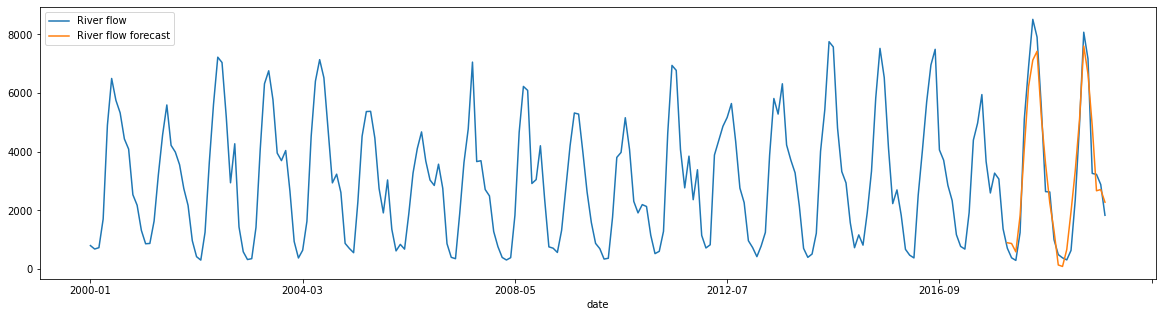


 ################ Basin 48 ############### 

(205, 1, 33) (205,) (24, 1, 33) (24,)
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
Epoch 00021: early stopping
24 batch size
Epoch 1/100
8/8 - 1s - loss: 0.2590 - rmse: 0.5089 - val_loss: 0.2014 - val_rmse: 0.4487
Epoch 2/100
8/8 - 0s - loss: 0.1384 - rmse: 0.3720 - val_loss: 0.1094 - val_rmse: 0.3307
Epoch 3/100
8/8 - 0s - loss: 0.1002 - rmse: 0.3166 - val_loss: 0.0968 - val_rmse: 0.3112
Epoch 4/100
8/8 - 0s - loss: 0.0831 - rmse: 0.2882 - val_loss: 0.0798 - val_rmse: 0.2824
Epoch 5/100
8/8 - 0s - loss: 0.0688 - rmse: 0.2622 - val_loss: 0.0634 - val_rmse: 0.2519
Epoch 6/100
8/8 - 0s - loss: 0.0590 - rmse: 0.2430 - val_loss: 0.0525 - val_rmse: 0.2292
Epoch 7/100
8/8 - 0s - loss: 0.0507 - rmse: 0.2251 - val_loss: 0.0422 - val_rmse: 0.2054
Epoch 8/100
8/8 - 0s - loss: 0.0417 - rmse: 0.2043 - val_loss: 0.0324 - val_rmse: 0.1799
Epoch 9/100
8/8 - 0s - loss: 0.0334 - rmse: 0.1829

Epoch 90/100
8/8 - 0s - loss: 0.0057 - rmse: 0.0758 - val_loss: 0.0067 - val_rmse: 0.0819
Epoch 91/100
8/8 - 0s - loss: 0.0057 - rmse: 0.0757 - val_loss: 0.0067 - val_rmse: 0.0818
Epoch 92/100
8/8 - 0s - loss: 0.0057 - rmse: 0.0756 - val_loss: 0.0067 - val_rmse: 0.0817
Epoch 93/100
8/8 - 0s - loss: 0.0057 - rmse: 0.0755 - val_loss: 0.0067 - val_rmse: 0.0816
Epoch 94/100
8/8 - 0s - loss: 0.0057 - rmse: 0.0754 - val_loss: 0.0067 - val_rmse: 0.0816
Epoch 95/100
8/8 - 0s - loss: 0.0057 - rmse: 0.0753 - val_loss: 0.0066 - val_rmse: 0.0815
Epoch 96/100
8/8 - 0s - loss: 0.0057 - rmse: 0.0752 - val_loss: 0.0066 - val_rmse: 0.0814
Epoch 97/100
8/8 - 0s - loss: 0.0056 - rmse: 0.0751 - val_loss: 0.0066 - val_rmse: 0.0814
Epoch 98/100
8/8 - 0s - loss: 0.0056 - rmse: 0.0750 - val_loss: 0.0066 - val_rmse: 0.0813
Epoch 99/100
8/8 - 0s - loss: 0.0056 - rmse: 0.0749 - val_loss: 0.0066 - val_rmse: 0.0812
Epoch 100/100
8/8 - 0s - loss: 0.0056 - rmse: 0.0748 - val_loss: 0.0066 - val_rmse: 0.0812
Test RMSE

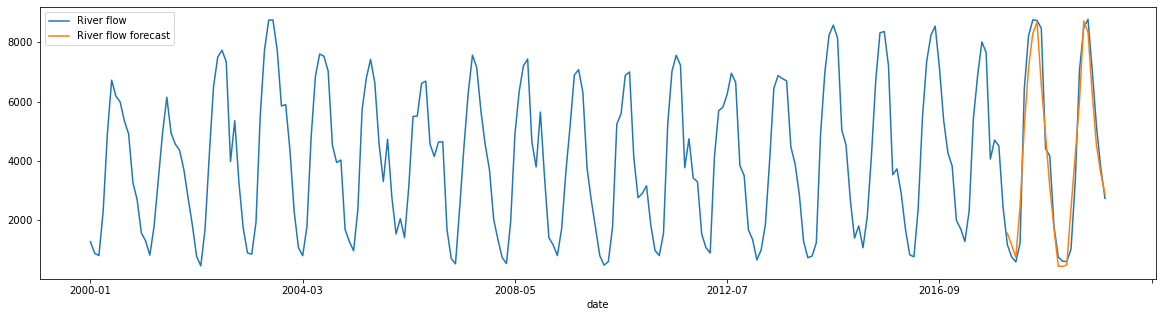

In [15]:
RMSE = []
MAPE = []
sMAPE = []
epochs = []
batch_sizes = []
list_df_plot = []

for i in mcs:
    print("\n ################ Basin " + str(i) + " ############### \n")
    temp_df = data[data['mc'] == i][['v_flow_mean', 'v_loss_cover', 
                                         'v_rainfall_total']].copy().reset_index(drop = True)
    nobs = 24 #predict 1 year
    df_train, df_test = temp_df[0:-nobs], temp_df[-nobs:]

    #Scale variables between 0 and 1 (using min and max from validation data)
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(df_train)
    test_scaled = scaler.transform(df_test)
    scaled = np.concatenate([train_scaled, test_scaled], axis=0)

    reframed = series_to_supervised(scaled, 11)
    reframed.drop(reframed.columns[[reframed.shape[1]-2, reframed.shape[1]-1]], axis=1, inplace=True)
    reframed

    #Transform to format required for LSTM 
    values = reframed.values
    n_train_months = reframed.shape[0]-(12*2)
    train = values[:n_train_months, :]
    test = values[n_train_months:, :]
    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    #Define LSTM model
    # design network
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError(name='rmse')])
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=20,  verbose=1, mode='min')
    callbacks_list = [earlystop]
    # hyperparameter tunning
    batch_size = [12, 24, 36, 48, 60, 72]
    res = [model.fit(train_X, train_y, epochs=100, batch_size=batch, verbose=0, shuffle=False, validation_split=0.15, callbacks=callbacks_list).history['val_rmse'][-1] for batch in batch_size]
    best_batch = batch_size[np.argmin(res)]
    print(str(best_batch)+ " batch size")
    batch_sizes.append(best_batch)
    # fit network
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError(name='rmse')])
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=20,  verbose=1, mode='min')
    callbacks_list = [earlystop]
    history = model.fit(train_X, train_y, epochs=100, batch_size=best_batch, verbose=2, shuffle=False, validation_split=0.15, callbacks=callbacks_list)# validation_data=(test_X, test_y), 
    epochs.append(history.epoch[-1])
    # plot history
    #pyplot.plot(history.history['loss'], label='train')
    #pyplot.plot(history.history['val_loss'], label='test')
    #pyplot.legend()
    #pyplot.show()

    #Evaluate model
    # make a prediction
    yhat = model.predict(test_X)
    test_X2 = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    # invert scaling for forecast
    inv_yhat = concatenate((yhat, test_X2[:, 1:3]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test_y, test_X2[:, 1:3]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    # calculate RMSE
    rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
    print('Test RMSE: %.3f' % rmse)
    print('Mean Absolute Percentage Error:', np.mean(np.abs((inv_y - inv_yhat) / inv_y)) * 100)
    print('Symmetric Mean Absolute Percentage Error:', np.mean(np.abs((inv_y - inv_yhat) / (abs(inv_y)+abs(inv_yhat)))) * 100)

    RMSE.append(rmse)
    MAPE.append(np.mean(np.abs((inv_y - inv_yhat) / inv_y)) * 100)
    sMAPE.append(np.mean(np.abs((inv_y - inv_yhat) / (abs(inv_y)+abs(inv_yhat)))) * 100)

    #Plot original series + predictions
    inv_yhat_s = pd.Series(inv_yhat)
    inv_yhat_s.index = range((temp_df.shape[0]-24), temp_df.shape[0])
    dict1 = {'River flow' : temp_df['v_flow_mean'], 'River flow forecast' : inv_yhat_s}
    df_plot = pd.DataFrame(dict1)
    df_plot.index = macrodata[data['mc'] == i]['date'].reset_index().date
    df_plot.plot(figsize=(20,5))
    pyplot.show()
    
    #Export observed and predicted for plotting
    list_df_plot.append(df_plot)

In [16]:
#pd.DataFrame(RMSE, means, sd)
dict = {'basin': mcs, 'RMSE': RMSE,  'MAPE': MAPE, 'sMAPE': sMAPE, 'epochs': epochs, 'batch_size': batch_sizes}  
    
df = pd.DataFrame(dict) 
df

basin        RMSE        MAPE      sMAPE  epochs  batch_size
0       1    0.430648   13.898154   6.510948      79          24
1       2   12.606451   49.572768  26.304385      37          12
2       3   49.692316   21.460559  11.491825      39          12
3       4    1.999200   30.313124  18.839158      44          12
4       5   15.601605   22.317389  12.290797      52          12
5       6   13.216449   31.272736  15.006944      80          12
6       7   68.174396   25.300017  12.097111      35          12
7       8   15.841573   27.169815  16.043049      35          12
8       9    6.093757   53.386218  25.377400      32          12
9      10    8.417383   37.986616  24.726054      32          12
10     11    7.206325   36.438078  15.944589      28          12
11     12   13.401077   64.228286  23.404834      47          12
12     13   97.793318   27.645580  14.537504      42          12
13     14   32.763996   31.074059  16.904185      42          12
14     15   35.303411   49.039171  24.891033      39          12
15     16  115.385153   21.962132  10.077297      88          12
16     17    2.079281   15.414091   7.754910      99          24
17     18   13.960952   18.611577   8.652883      20          24
18     19    7.117719   98.253598  46.912680      60          12
19     20   43.224084   34.588354  16.974692      50          12
20     21    2.443384   22.100859  12.285093      36          12
21     22   93.623800   80.168554  34.672250      36          12
22     23   55.672098   60.342056  23.454955      99          60
23     24   18.286631   77.652890  58.639283      23          12
24     25    4.429466   43.155543  29.712235      26          12
25     26  215.568387  289.339437  56.583734      42          12
26     27   16.937552   81.648347  39.402555      28          12
27     28   32.216339   35.879876  20.467691      59          12
28     29    7.390209   11.288662   6.053593      38          12
29     30    5.712364   60.830073  34.673864      73          72
30     31    2.149416   21.681071   9.578894      96          24
31     32    9.036427   27.346436  11.855138      38          12
32     33    1.121410   20.054782   9.748225      62          36
33     34   75.863874   24.494411  10.239556      37          12
34     35  156.081199   37.531120  22.721947      35          12
35     36   58.592371   71.007441  24.845468      57          12
36     37   56.193733   61.384802  29.195087      34          12
37     38   12.028966   15.466577   8.558068      29          12
38     39  247.434241   44.387612  21.891698      99          60
39     40  502.356258   50.370348  23.050551      79          60
40     41  847.507688   39.142762  20.667375      59          12
41     42  308.248235   57.514473  15.341590      50          36
42     43  354.782655   32.196660  16.098492      51          12
43     44  749.089480   24.192382  12.786250      43          12
44     45  535.061248   64.316489  30.000525      48          24
45     46  919.480309   81.914423  21.598701      90          12
46     47  715.720341   44.437301  18.571832      99          24
47     48  794.548571   25.945976  11.270587      99          24

In [17]:
df.to_csv(r'LSTM_results_2years.csv', index=False)

In [18]:
list_out = []
for i in range(len(mcs)):
    tmp = list_df_plot[i].copy()
    tmp['Basin'] = mcs[i]
    list_out.append(tmp)

df_out = pd.concat(list_out, axis=0)
df_out.to_csv(r'LSTM_predictions_2years.csv')

In [12]:
list_out[0][220:241]

River flow  River flow forecast  Basin
date                                           
2018-05        3.40                  NaN      1
2018-06        4.61                  NaN      1
2018-07        4.19                  NaN      1
2018-08        3.46                  NaN      1
2018-09        2.31                  NaN      1
2018-10        2.48                  NaN      1
2018-11        2.98             2.606475      1
2018-12        2.63             2.402564      1
2019-01        1.64             2.306438      1
2019-02        1.73             1.944544      1
2019-03        2.15             2.350643      1
2019-04        3.00             3.021954      1
2019-05        3.24             4.655044      1
2019-06        4.62             5.613949      1
2019-07        4.38             4.937642      1
2019-08        3.59             3.359764      1
2019-09        2.42             2.489174      1
2019-10        2.48             2.698437      1
2019-11        3.07             3.017487      1
2019-12        2.73             3.183259      1